<a href="https://colab.research.google.com/github/Mitchelle-64/ENG4110P/blob/main/Transport_Network_1_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Graph Network

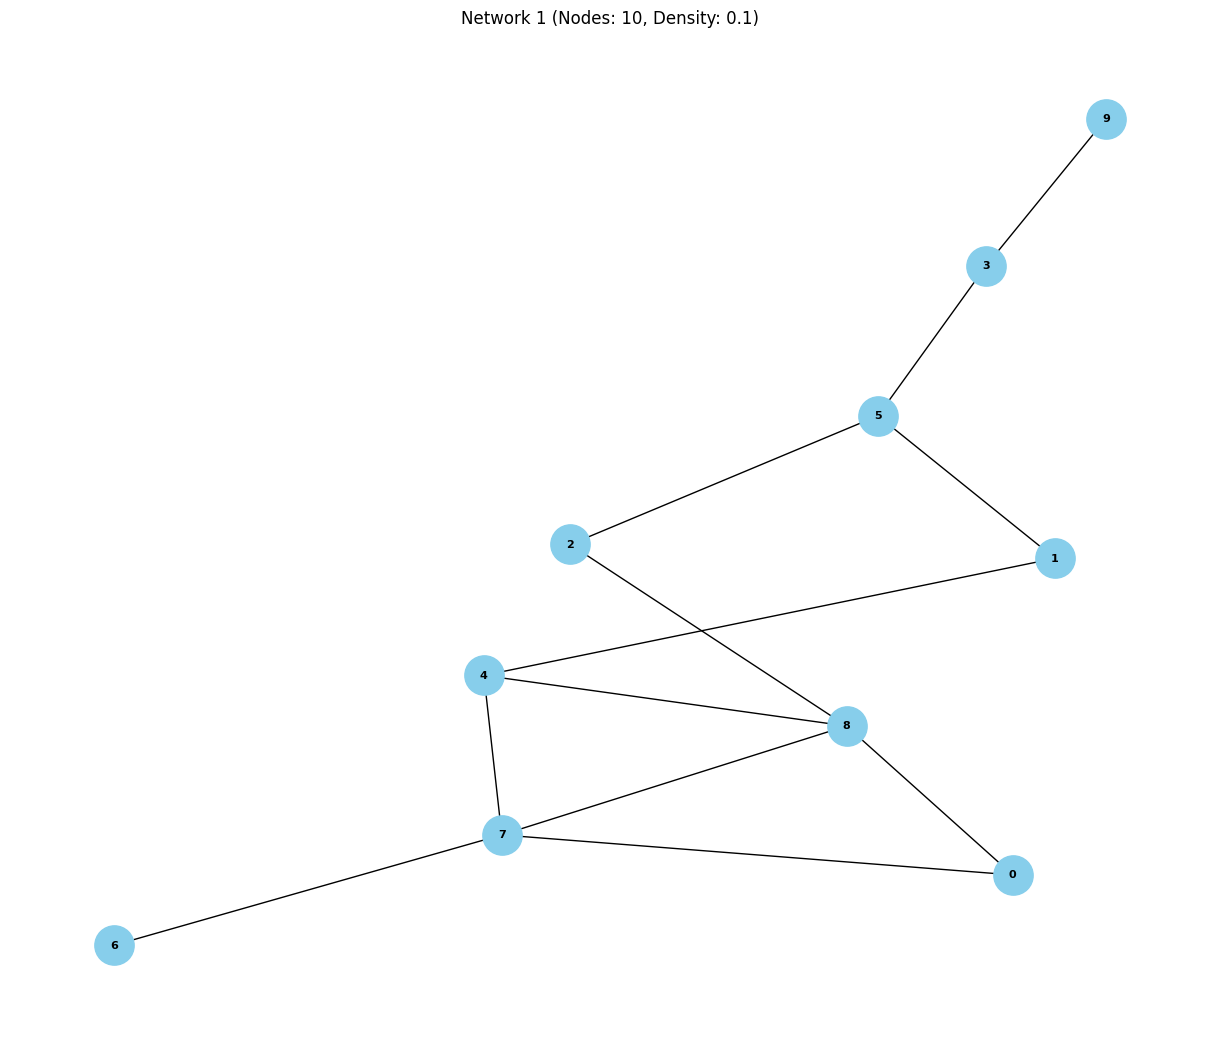

Network 1:
{'graph': <networkx.classes.graph.Graph object at 0x792cc03b33a0>, 'pos': {0: array([ 0.15921176, -0.58460482]), 1: array([0.1853624 , 0.07883379]), 2: array([-0.11457514,  0.10790027]), 3: array([0.14280847, 0.69208182]), 4: array([-0.16802811, -0.16651576]), 5: array([0.07583132, 0.37753691]), 6: array([-0.39685543, -0.7319467 ]), 7: array([-0.15698873, -0.50077789]), 8: array([ 0.05636784, -0.27250763]), 9: array([0.21686563, 1.        ])}, 'edge_colors': [], 'edge_lengths': {(0, 7): 0.3271233752155003, (0, 8): 0.32860542894014966, (1, 4): 0.4302107134630714, (1, 5): 0.3181518678056649, (2, 5): 0.33008869130015744, (2, 8): 0.417051159100476, (3, 5): 0.32159669349729525, (3, 9): 0.31669870679435835, (4, 7): 0.3344443743497029, (4, 8): 0.24816892126427048, (6, 7): 0.33312917808815334, (7, 8): 0.31245534176421325}}


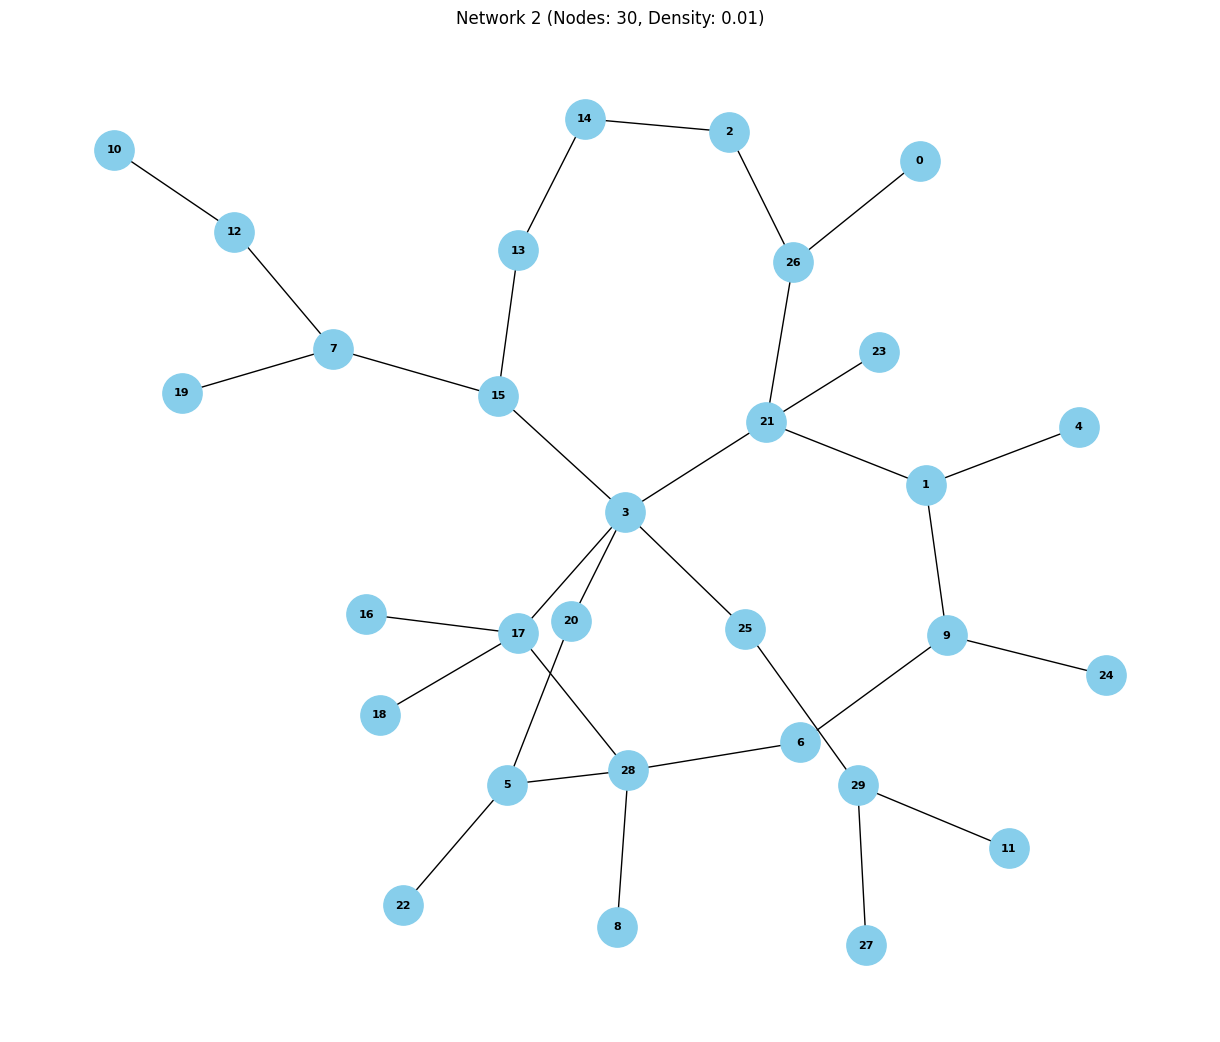

Network 2:
{'graph': <networkx.classes.graph.Graph object at 0x792cc0342650>, 'pos': {0: array([0.50277276, 0.73543515]), 1: array([0.51413494, 0.08765797]), 2: array([0.146376  , 0.79284866]), 3: array([-0.04667953,  0.03354118]), 4: array([0.80011027, 0.20390221]), 5: array([-0.26722698, -0.50973037]), 6: array([ 0.28048534, -0.42549242]), 7: array([-0.59155484,  0.36022321]), 8: array([-0.06140327, -0.79370931]), 9: array([ 0.55340789, -0.21192785]), 10: array([-1.        ,  0.75664718]), 11: array([ 0.66947614, -0.63710952]), 12: array([-0.7754534 ,  0.59376501]), 13: array([-0.24623796,  0.5560608 ]), 14: array([-0.12167057,  0.81873785]), 15: array([-0.28364606,  0.265517  ]), 16: array([-0.52980976, -0.17021116]), 17: array([-0.24577244, -0.20831782]), 18: array([-0.50425589, -0.37036092]), 19: array([-0.87391138,  0.27146366]), 20: array([-0.1477248 , -0.18317884]), 21: array([0.2172365 , 0.21339246]), 22: array([-0.46063113, -0.75069336]), 23: array([0.42668491, 0.35321802]), 

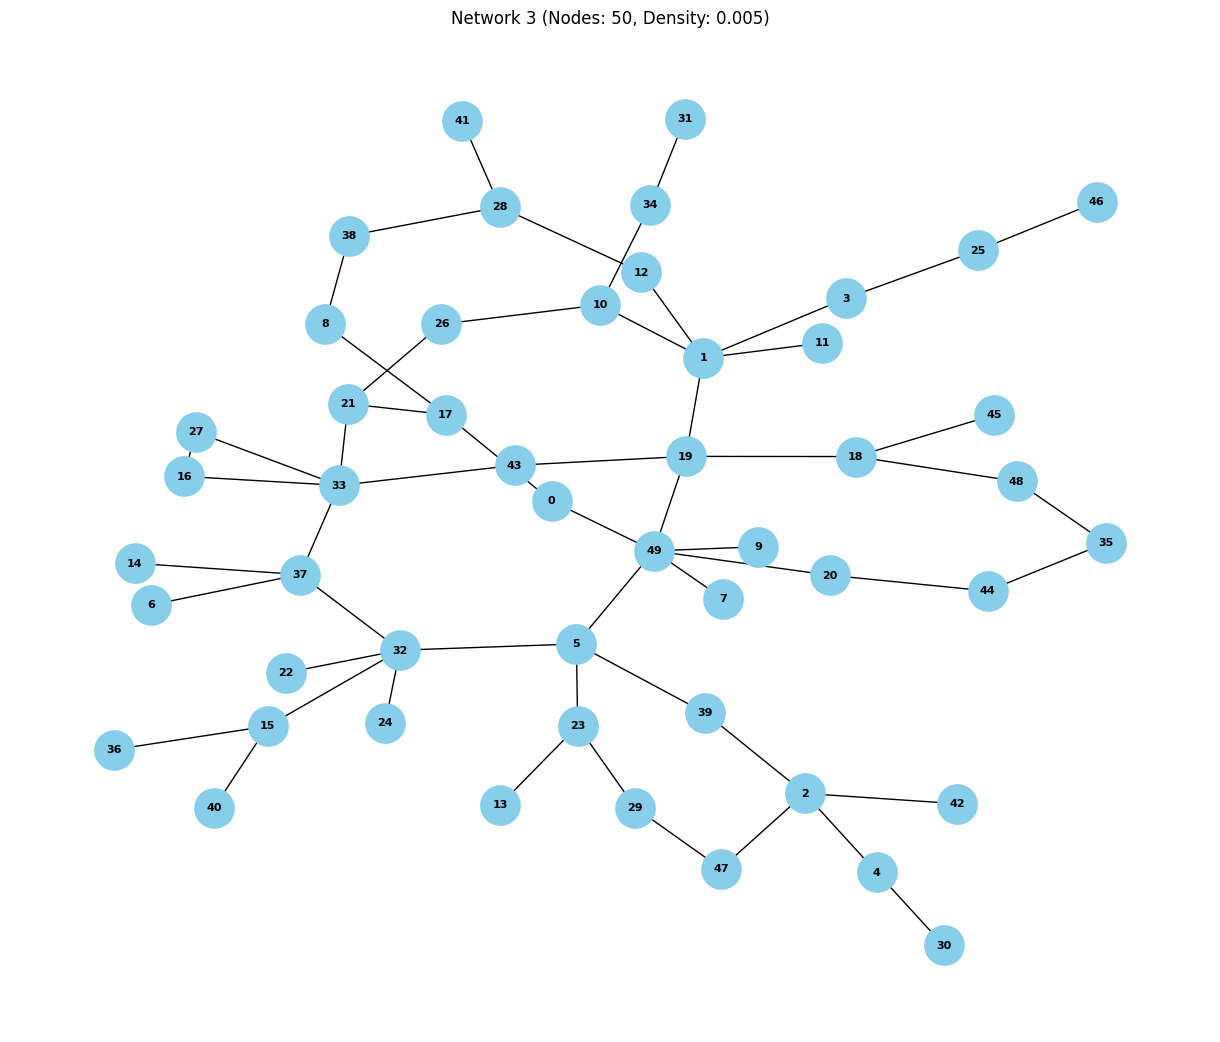

Network 3:
{'graph': <networkx.classes.graph.Graph object at 0x792cc0c73f40>, 'pos': {0: array([-0.06019054,  0.04507695]), 1: array([0.1416514 , 0.38148682]), 2: array([ 0.27705644, -0.64285441]), 3: array([0.33179798, 0.52171338]), 4: array([ 0.37284818, -0.82816011]), 5: array([-0.02722951, -0.29122636]), 6: array([-0.59413541, -0.19944765]), 7: array([ 0.16785239, -0.18451497]), 8: array([-0.36230939,  0.46142401]), 9: array([ 0.21507732, -0.06257351]), 10: array([0.00453854, 0.50639455]), 11: array([0.30021072, 0.41672474]), 12: array([0.05892863, 0.58327227]), 13: array([-0.12861498, -0.66936018]), 14: array([-0.61570079, -0.10145939]), 15: array([-0.43855794, -0.48457522]), 16: array([-0.55000416,  0.10300193]), 17: array([-0.20132413,  0.24849908]), 18: array([0.34507313, 0.14958937]), 19: array([0.11865386, 0.14997108]), 20: array([ 0.31014389, -0.12952842]), 21: array([-0.3314674 ,  0.27356991]), 22: array([-0.41453859, -0.35911865]), 23: array([-0.02556604, -0.48388415]), 24

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

def generate_adjacency_matrix(num_nodes, density):
    # Generate a random adjacency matrix with the specified density
    adjacency_matrix = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        # Randomly choose a neighbor for node i
        neighbor = np.random.choice([node for node in range(num_nodes) if node != i])
        adjacency_matrix[i, neighbor] = 1
    # Randomly add additional edges based on density
    num_edges = int(density * num_nodes * (num_nodes - 1) / 2)
    for _ in range(num_edges):
        i, j = np.random.choice(num_nodes, size=2, replace=False)
        adjacency_matrix[i, j] = 1
        adjacency_matrix[j, i] = 1
    return adjacency_matrix

def create_graph_from_adjacency_matrix(adjacency_matrix):
    # Create a NetworkX graph from the adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix)
    return G

def visualize_graph(G, title, pos, edge_colors=None, figsize=(12, 10)):
    # Create a new figure with the specified figsize
    plt.figure(figsize=figsize)
    # Draw the graph with specified node positions and edge colors
    if edge_colors is not None:
        nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=800,
                font_size=8, font_weight='bold', edge_color=edge_colors, width=2.0)
    else:
        nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=800,
                font_size=8, font_weight='bold')
    # Display the plot
    plt.title(title)
    plt.show()

# Define parameters for the networks
num_nodes_list = [10, 30, 50]  # Number of nodes in each network
density_list = [0.1, 0.01, 0.005]  # Density of connections in each network

# Initialize dictionary to store positions of nodes and networks
networks = {}

# Generate and visualize networks with increasing complexity
for i, (num_nodes, density) in enumerate(zip(num_nodes_list, density_list), start=1):
    # Generate adjacency matrix
    adjacency_matrix = generate_adjacency_matrix(num_nodes, density)
    # Create NetworkX graph
    G = create_graph_from_adjacency_matrix(adjacency_matrix)
    # Calculate node positions using Kamada-Kawai layout algorithm
    pos = nx.kamada_kawai_layout(G)
    # Calculate edge lengths
    edge_lengths = {edge: np.linalg.norm(np.array(pos[edge[0]]) - np.array(pos[edge[1]])) for edge in G.edges()}
    # Store node positions, graph, edge colors, and edge lengths in the dictionary
    networks[f"Network {i}"] = {'graph': G, 'pos': pos, 'edge_colors': [], 'edge_lengths': edge_lengths}
    # Visualize the graph
    visualize_graph(G, f"Network {i} (Nodes: {num_nodes}, Density: {density})", pos)
    # Print the updated networks dictionary
    print(f"Network {i}:")
    print(networks[f"Network {i}"])

# Now you can use the stored networks for further development

# Print the updated networks dictionary
print('network details')
print(networks)


##Prelim network analysis:

###diameter

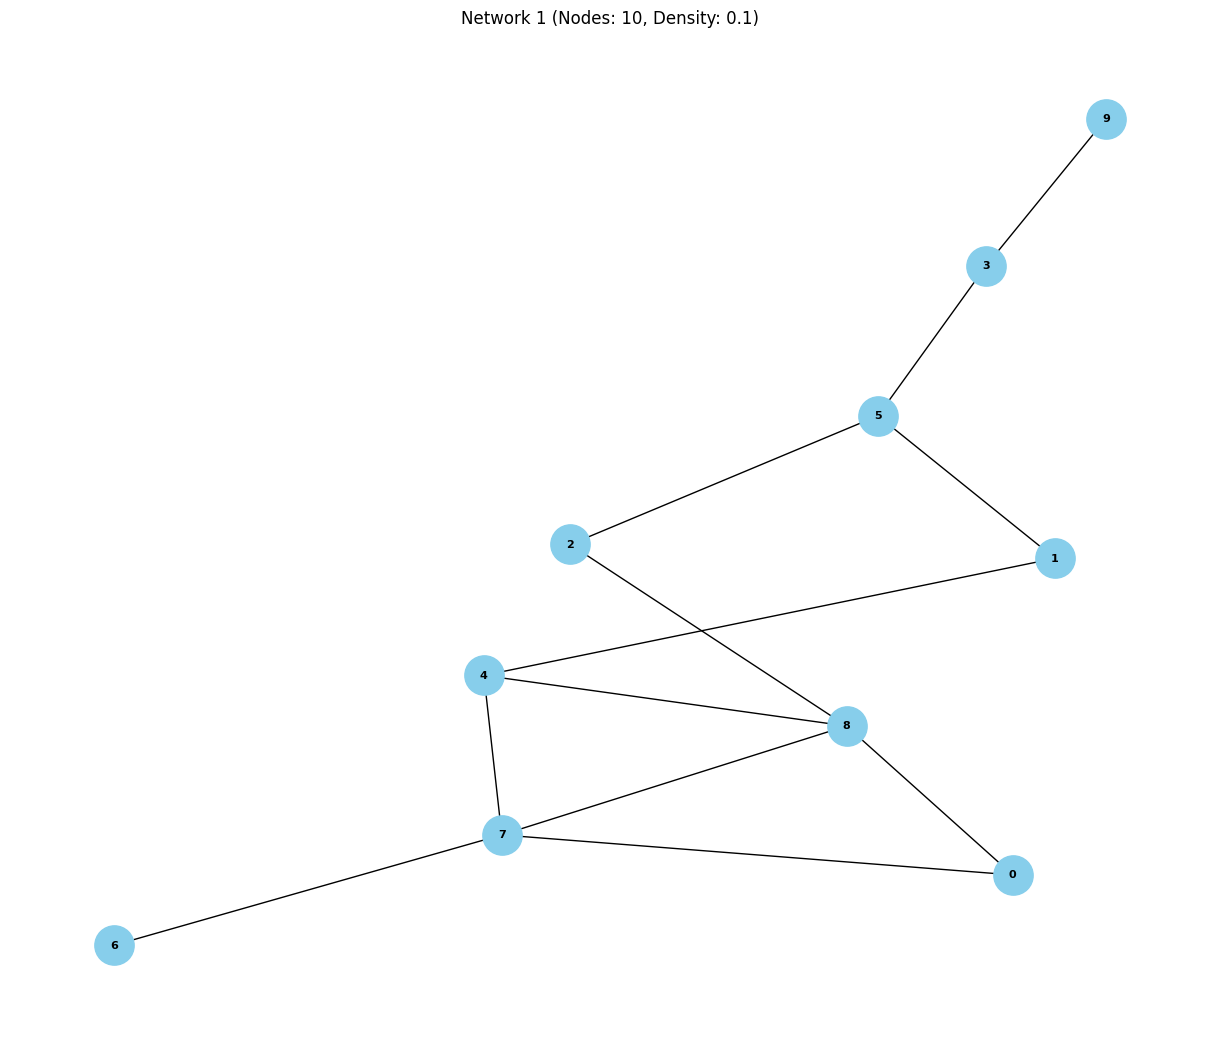

Network 1 Analysis:
Edge Lengths: {(0, 7): 0.3271233752155003, (0, 8): 0.32860542894014966, (1, 4): 0.4302107134630714, (1, 5): 0.3181518678056649, (2, 5): 0.33008869130015744, (2, 8): 0.417051159100476, (3, 5): 0.32159669349729525, (3, 9): 0.31669870679435835, (4, 7): 0.3344443743497029, (4, 8): 0.24816892126427048, (6, 7): 0.33312917808815334, (7, 8): 0.31245534176421325}
Diameter of the network: 6
Average shortest path length: 2.4444444444444446
Degree centrality of nodes: {0: 0.2222222222222222, 1: 0.2222222222222222, 2: 0.2222222222222222, 3: 0.2222222222222222, 4: 0.3333333333333333, 5: 0.3333333333333333, 6: 0.1111111111111111, 7: 0.4444444444444444, 8: 0.4444444444444444, 9: 0.1111111111111111}
Betweenness centrality of nodes: {0: 0.0, 1: 0.16666666666666666, 2: 0.25, 3: 0.2222222222222222, 4: 0.19444444444444442, 5: 0.41666666666666663, 6: 0.0, 7: 0.25, 8: 0.3055555555555555, 9: 0.0}
Closeness centrality of nodes: {0: 0.391304347826087, 1: 0.47368421052631576, 2: 0.5, 3: 0.36,

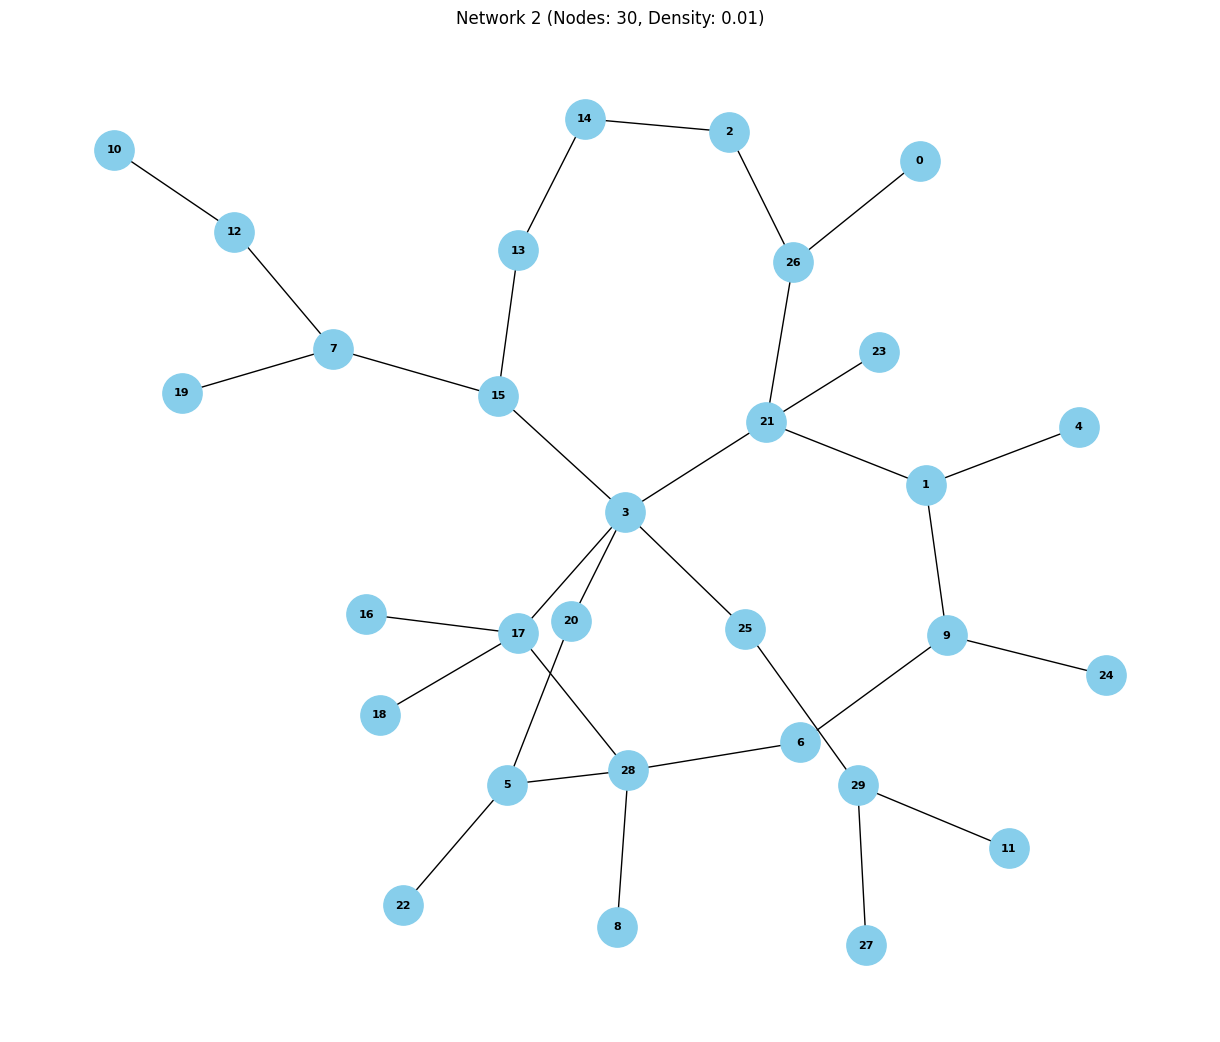

Network 2 Analysis:
Edge Lengths: {(0, 26): 0.3109309060648154, (1, 9): 0.3021490163322255, (1, 4): 0.30869825818919655, (1, 21): 0.322424942741022, (2, 26): 0.2870879149494903, (2, 14): 0.26929391650013657, (3, 15): 0.3316110902225055, (3, 21): 0.3193714944656424, (3, 17): 0.3132630941126897, (3, 20): 0.23911862202825412, (3, 25): 0.3230732510731192, (5, 20): 0.3477307461704007, (5, 28): 0.22829149576429114, (5, 22): 0.3089794992603989, (6, 28): 0.3260301859527859, (6, 9): 0.34654948875060465, (7, 15): 0.3221445062013453, (7, 12): 0.2972548639611148, (7, 19): 0.29597884024219306, (8, 28): 0.3126909484917768, (9, 24): 0.30760119344107795, (10, 12): 0.27740183375086713, (11, 29): 0.308842589572226, (13, 14): 0.29071681877930006, (13, 15): 0.2929420852634569, (16, 17): 0.28658212988948434, (17, 18): 0.30507648156060624, (17, 28): 0.3417776419621466, (21, 23): 0.25183293104719984, (21, 26): 0.3229481178049617, (25, 29): 0.3763662635623094, (27, 29): 0.31934548170469923}
Diameter of the ne

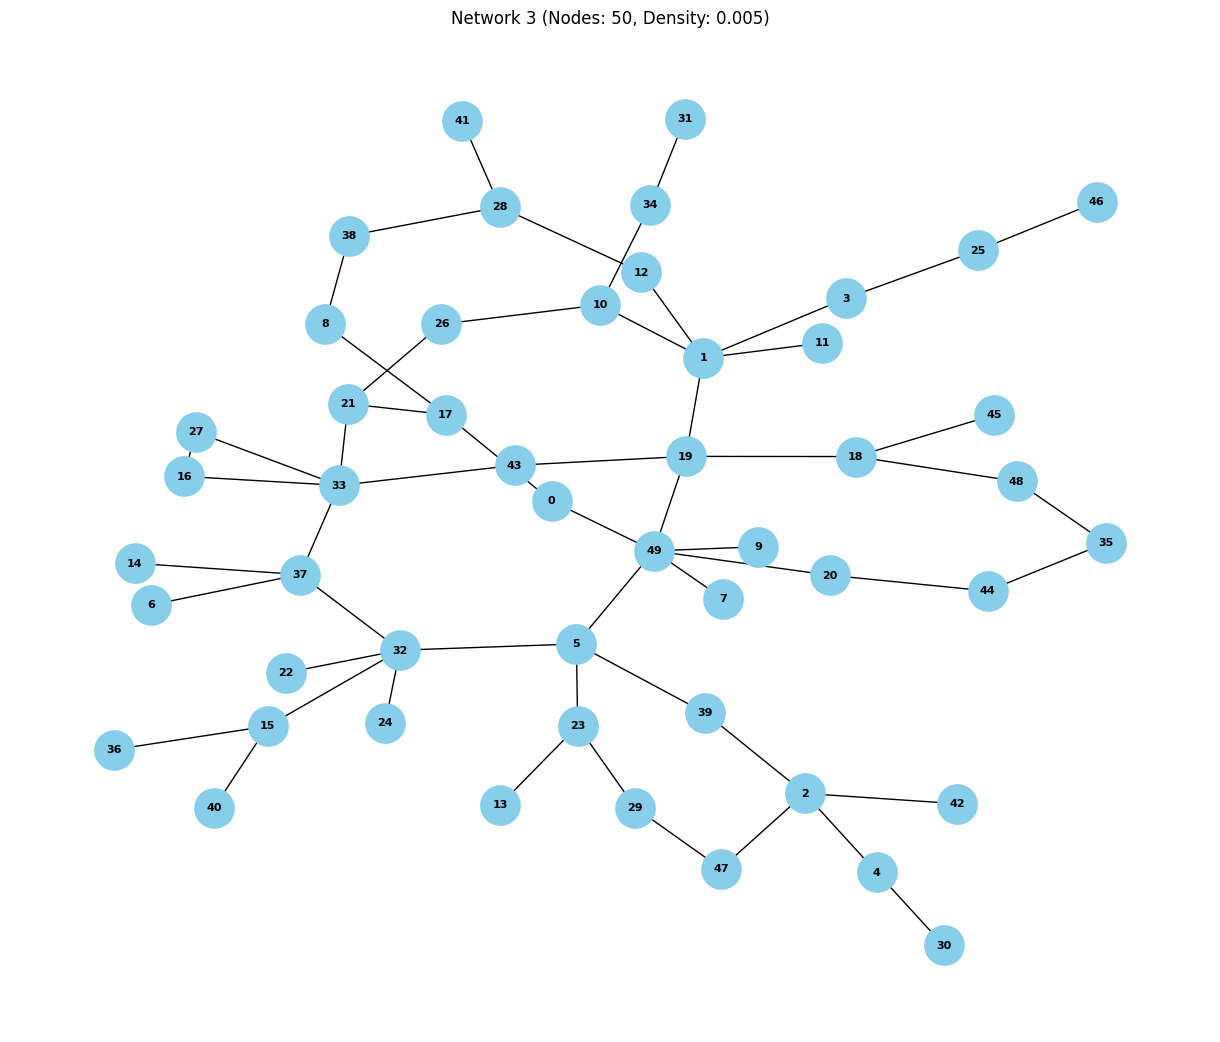

Network 3 Analysis:
Edge Lengths: {(0, 49): 0.17988029862564545, (0, 17): 0.2475868553302365, (1, 12): 0.2180835199525912, (1, 3): 0.236260896410832, (1, 10): 0.18547742587331104, (1, 11): 0.1624277358078838, (1, 19): 0.23265517016270335, (2, 39): 0.2314511389278739, (2, 4): 0.20860071061431387, (2, 42): 0.2047886064543397, (2, 47): 0.20908479814709444, (3, 25): 0.20932387865922386, (4, 30): 0.1936063336791961, (5, 49): 0.242064674780827, (5, 23): 0.19266496459103738, (5, 32): 0.23545838493510798, (5, 39): 0.23594423576897713, (6, 37): 0.2112466123992842, (7, 49): 0.14493519250112477, (8, 17): 0.2669330932157064, (8, 38): 0.2102243139436042, (9, 49): 0.13932178817264598, (10, 26): 0.2163567223310776, (10, 34): 0.24449050559986313, (12, 28): 0.24266038730335612, (13, 23): 0.21218021015647945, (14, 37): 0.22192642500002277, (15, 32): 0.2510066907704266, (15, 36): 0.21202977221246488, (15, 40): 0.20450554735719095, (16, 33): 0.20750562341817422, (16, 27): 0.10604000979856003, (17, 21): 0.

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

def generate_adjacency_matrix(num_nodes, density):
    # Generate a random adjacency matrix with the specified density
    adjacency_matrix = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        # Randomly choose a neighbor for node i
        neighbor = np.random.choice([node for node in range(num_nodes) if node != i])
        adjacency_matrix[i, neighbor] = 1
    # Randomly add additional edges based on density
    num_edges = int(density * num_nodes * (num_nodes - 1) / 2)
    for _ in range(num_edges):
        i, j = np.random.choice(num_nodes, size=2, replace=False)
        adjacency_matrix[i, j] = 1
        adjacency_matrix[j, i] = 1
    return adjacency_matrix

def create_graph_from_adjacency_matrix(adjacency_matrix):
    # Create a NetworkX graph from the adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix)
    return G

def visualize_graph(G, title, pos, edge_colors=None, figsize=(12, 10)):
    # Create a new figure with the specified figsize
    plt.figure(figsize=figsize)
    # Draw the graph with specified node positions and edge colors
    if edge_colors is not None:
        nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=800,
                font_size=8, font_weight='bold', edge_color=edge_colors, width=2.0)
    else:
        nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=800,
                font_size=8, font_weight='bold')
    # Display the plot
    plt.title(title)
    plt.show()

# Define parameters for the networks
num_nodes_list = [10, 30, 50]  # Number of nodes in each network
density_list = [0.1, 0.01, 0.005]  # Density of connections in each network

# Initialize dictionary to store positions of nodes and networks
networks = {}

# Generate and visualize networks with increasing complexity
for i, (num_nodes, density) in enumerate(zip(num_nodes_list, density_list), start=1):
    # Generate adjacency matrix
    adjacency_matrix = generate_adjacency_matrix(num_nodes, density)
    # Create NetworkX graph
    G = create_graph_from_adjacency_matrix(adjacency_matrix)
    # Calculate node positions using Kamada-Kawai layout algorithm
    pos = nx.kamada_kawai_layout(G)
    # Calculate edge lengths
    edge_lengths = {edge: np.linalg.norm(np.array(pos[edge[0]]) - np.array(pos[edge[1]])) for edge in G.edges()}
    # Store node positions, graph, edge colors, and edge lengths in the dictionary
    networks[f"Network {i}"] = {'graph': G, 'pos': pos, 'edge_colors': [], 'edge_lengths': edge_lengths}
    # Visualize the graph
    visualize_graph(G, f"Network {i} (Nodes: {num_nodes}, Density: {density})", pos)
    # Perform analysis on the network
    graph = networks[f"Network {i}"]['graph']
    edge_lengths = networks[f"Network {i}"]['edge_lengths']
    diameter = nx.diameter(graph)
    avg_shortest_path_length = nx.average_shortest_path_length(graph)
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    print(f"Network {i} Analysis:")
    print("Edge Lengths:", edge_lengths)
    print("Diameter of the network:", diameter)
    print("Average shortest path length:", avg_shortest_path_length)
    print("Degree centrality of nodes:", degree_centrality)
    print("Betweenness centrality of nodes:", betweenness_centrality)
    print("Closeness centrality of nodes:", closeness_centrality)

# Print the updated networks dictionary
print('network details')
print(networks)


###Number of cycles

Network: Network 1
Number of nodes (v): 10
Number of edges (e): 12
Number of sub-graphs (p): 1
Number of cycles (u): 3

Network: Network 2
Number of nodes (v): 30
Number of edges (e): 32
Number of sub-graphs (p): 1
Number of cycles (u): 3

Network: Network 3
Number of nodes (v): 50
Number of edges (e): 56
Number of sub-graphs (p): 1
Number of cycles (u): 7



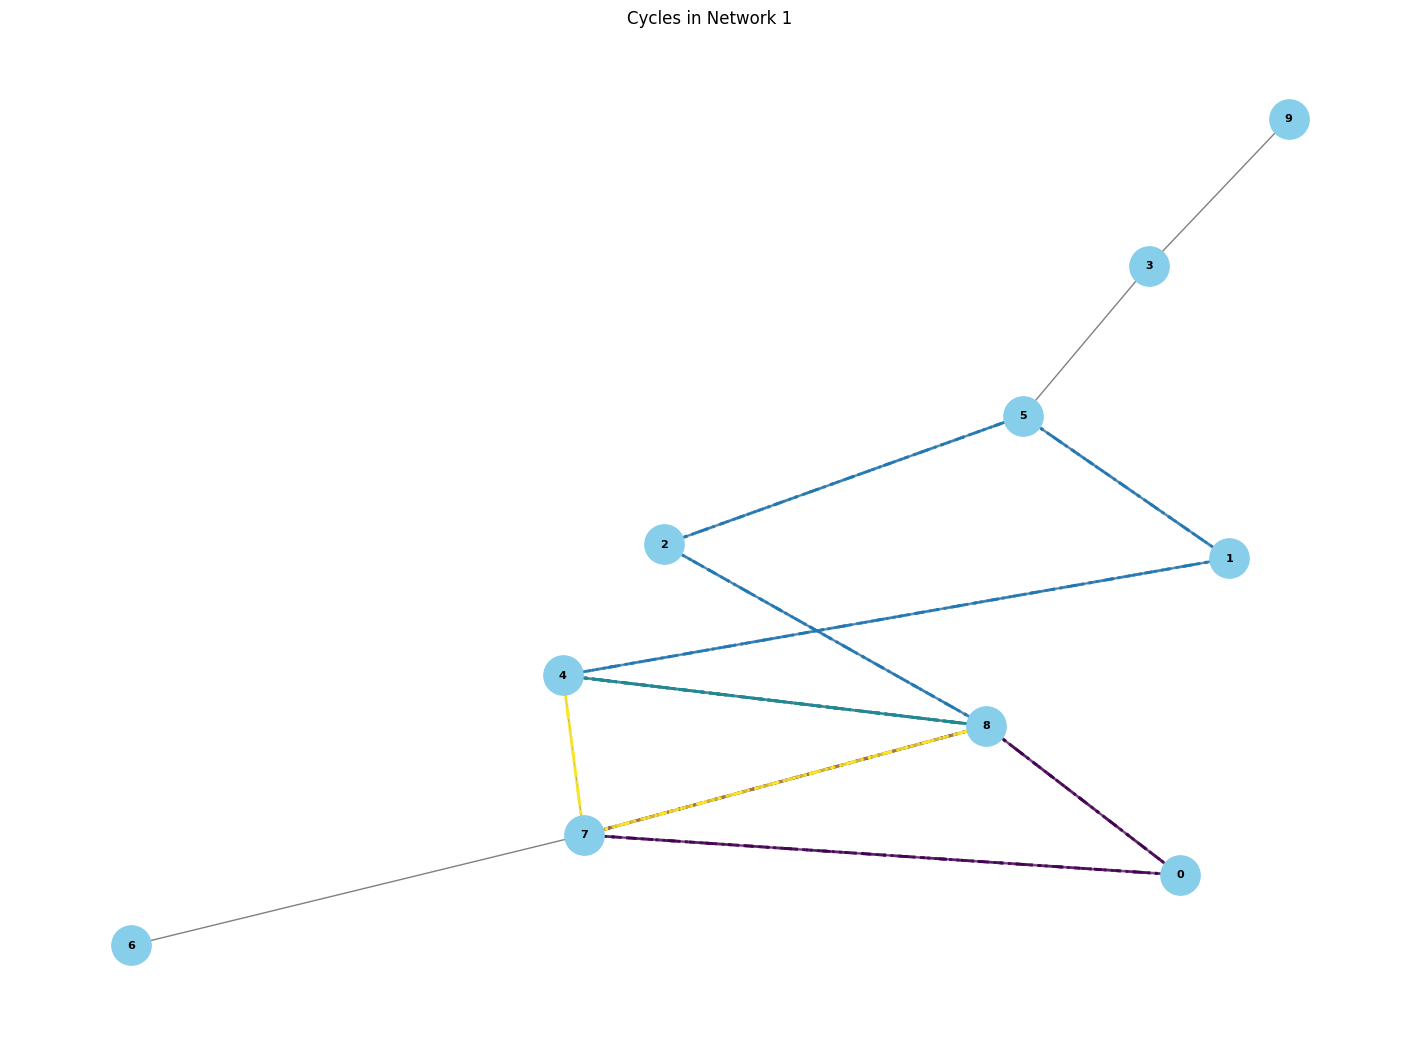

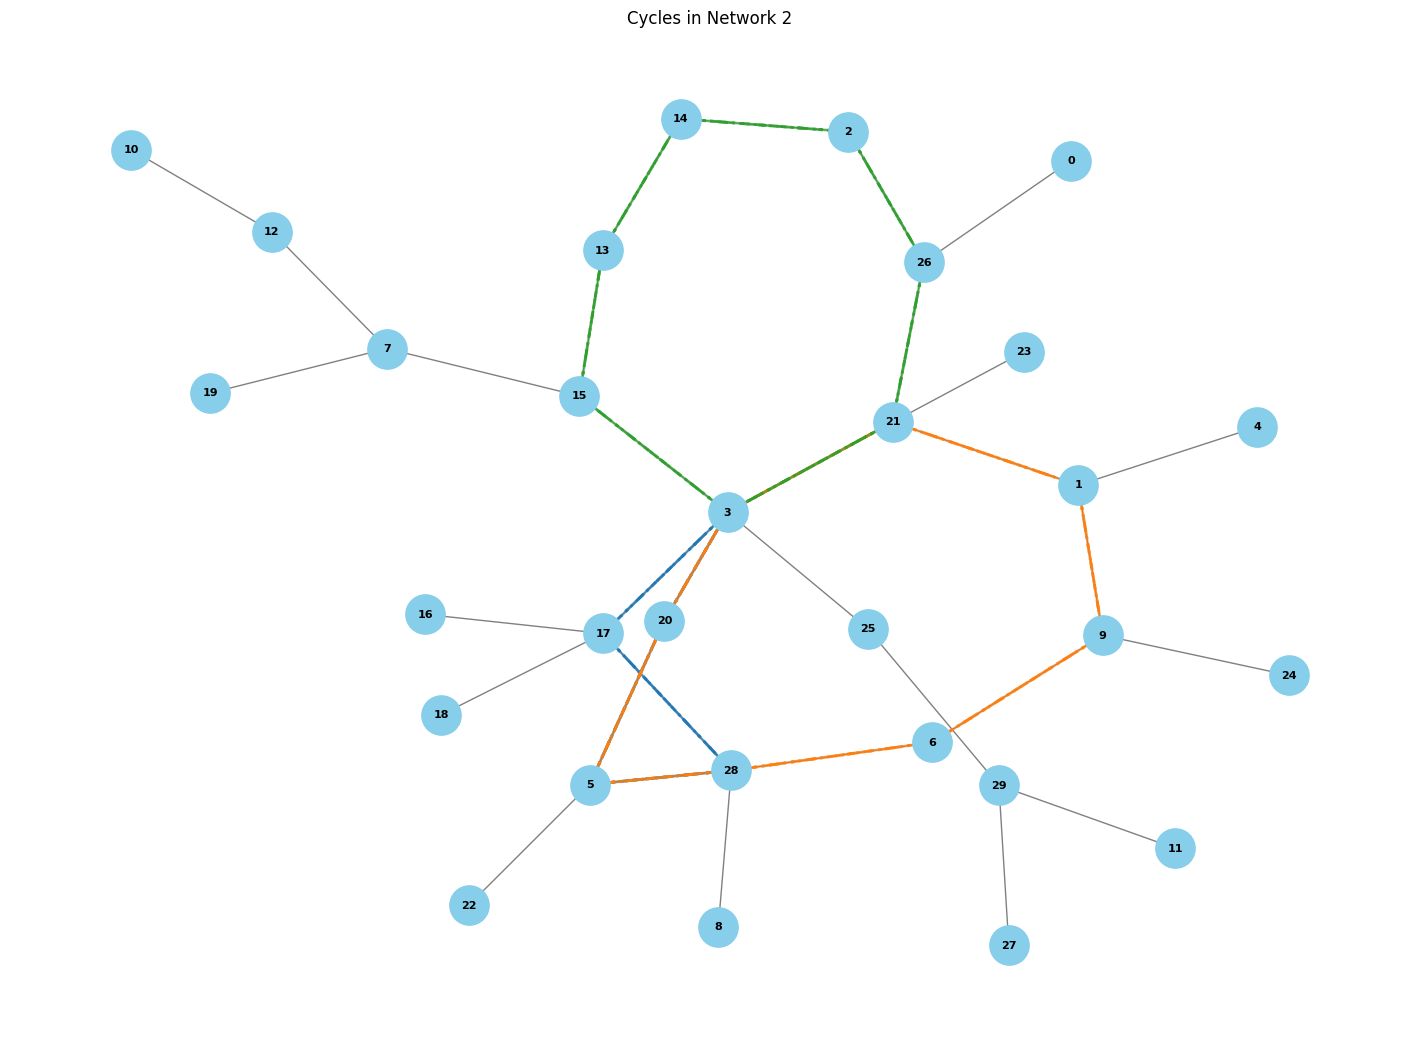

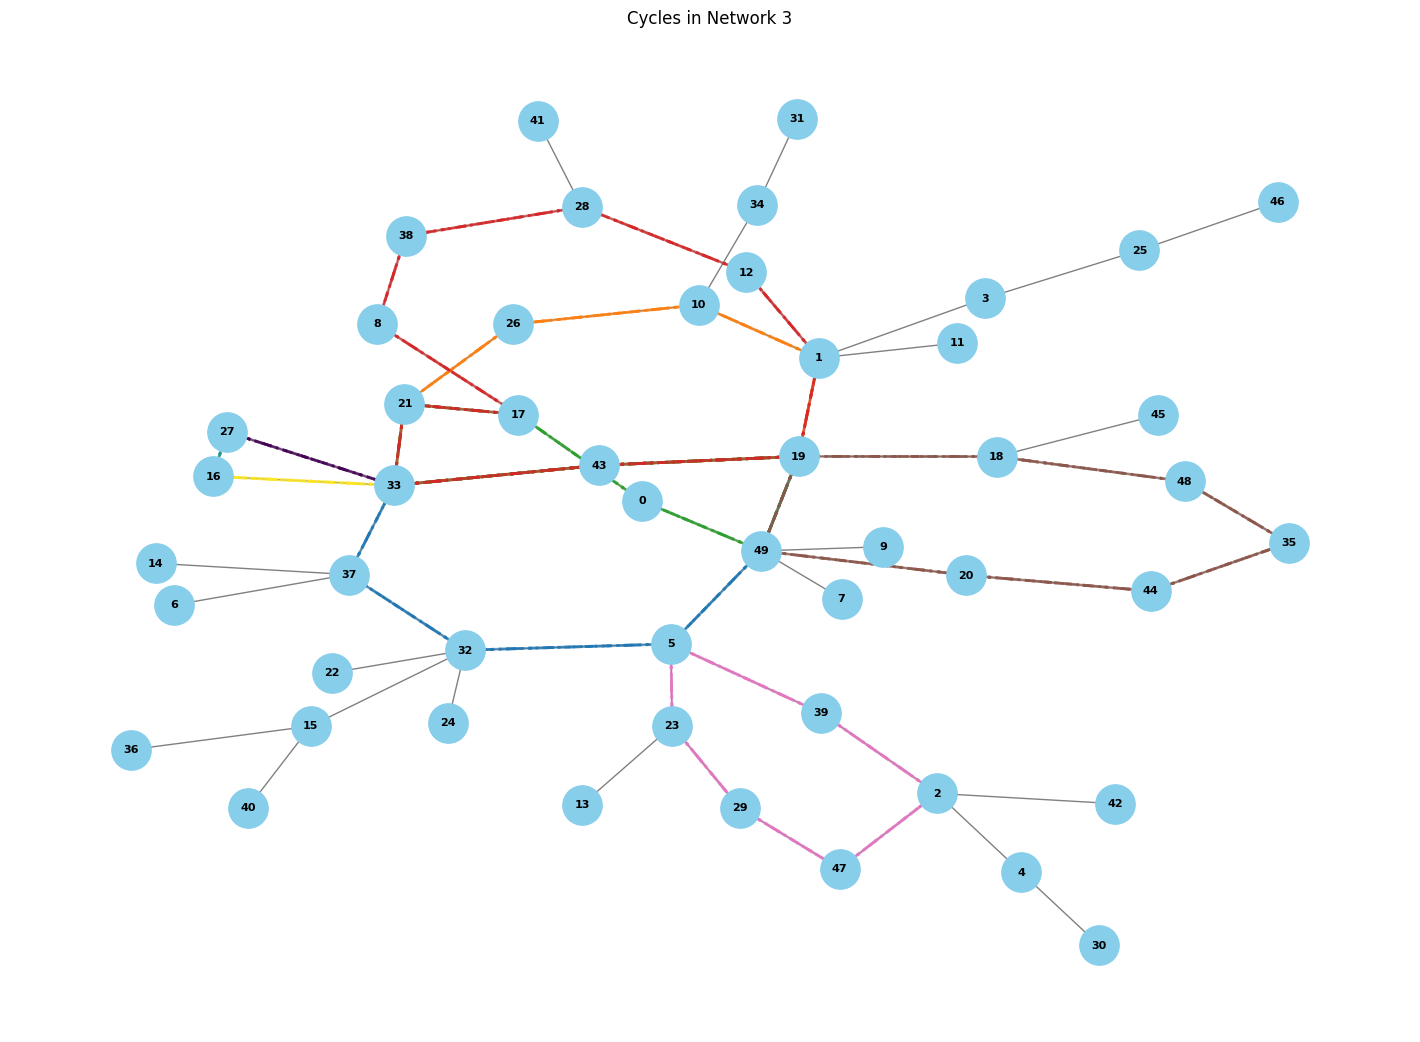

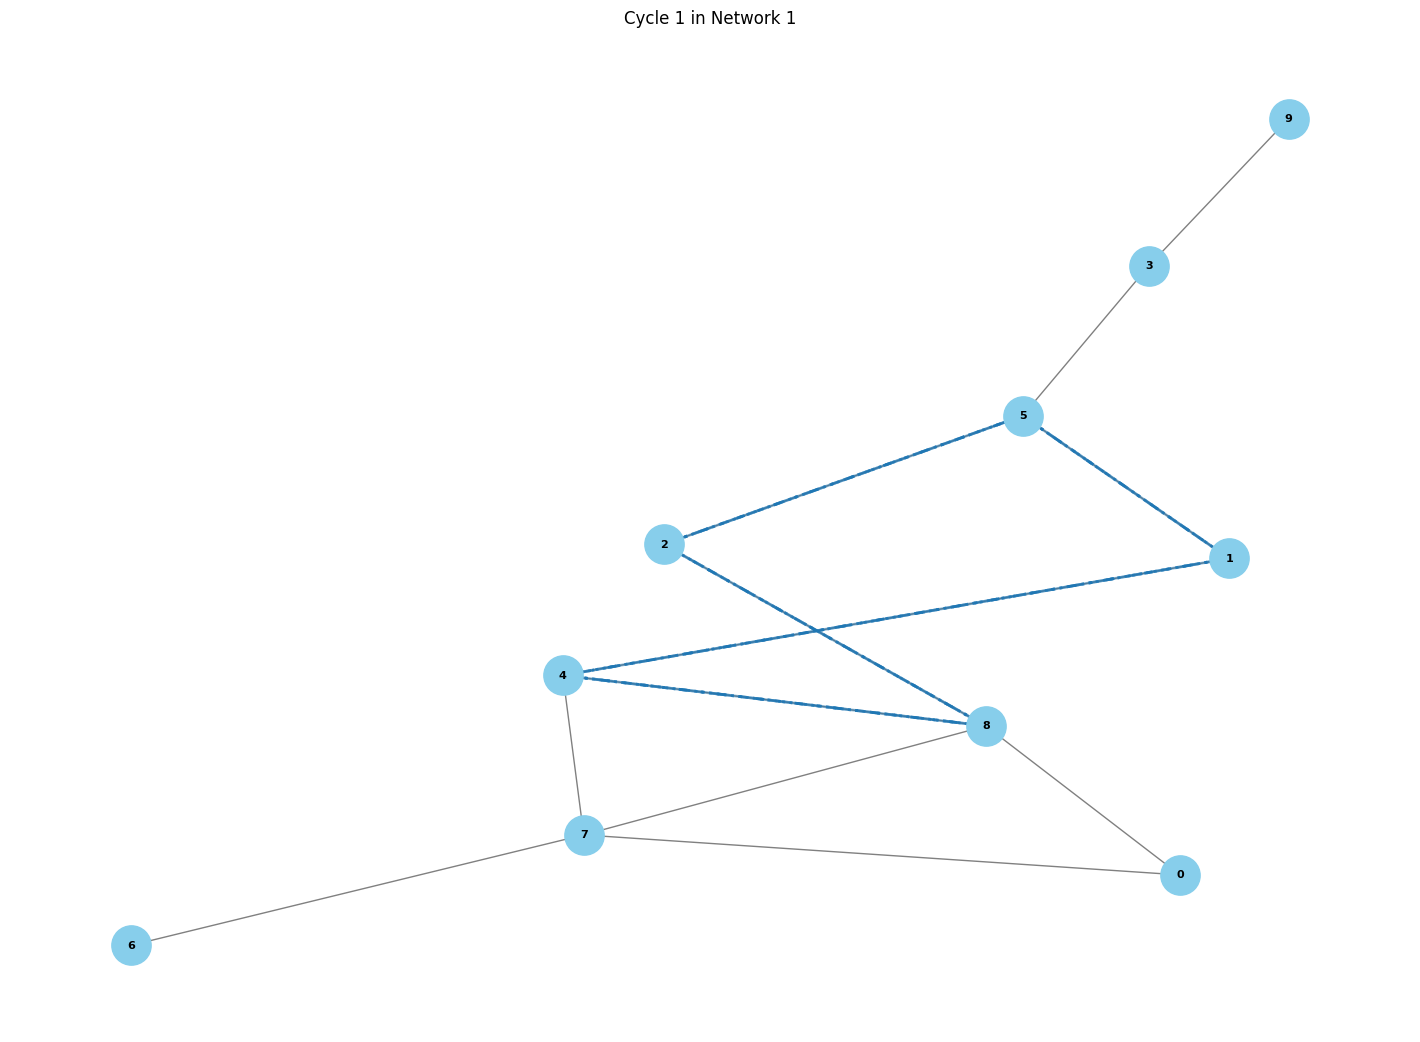

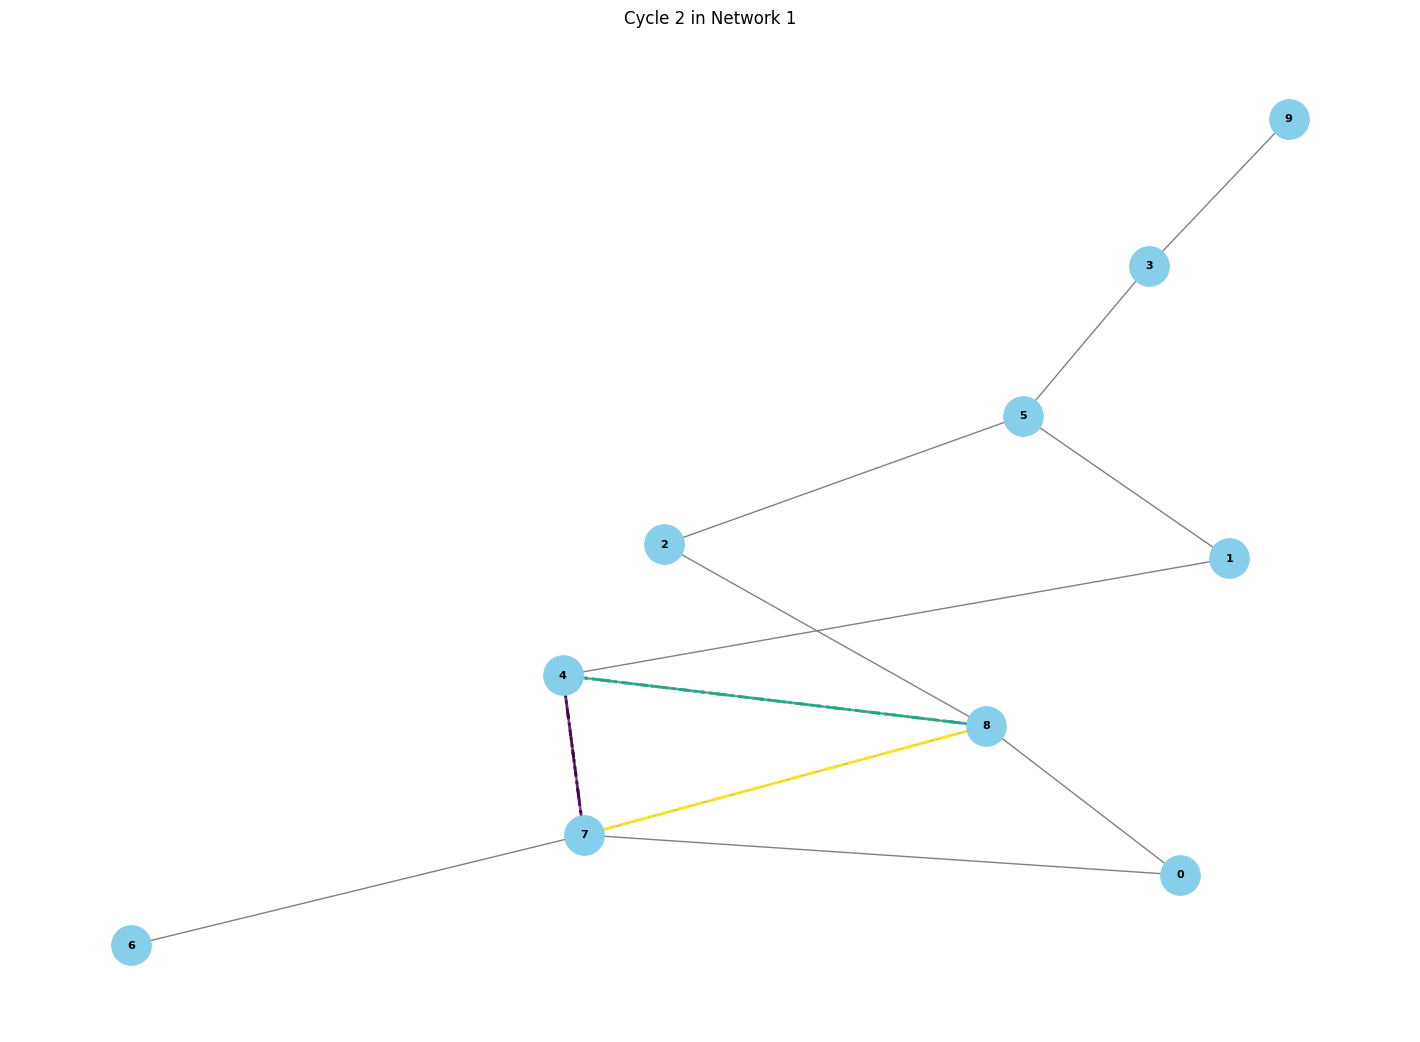

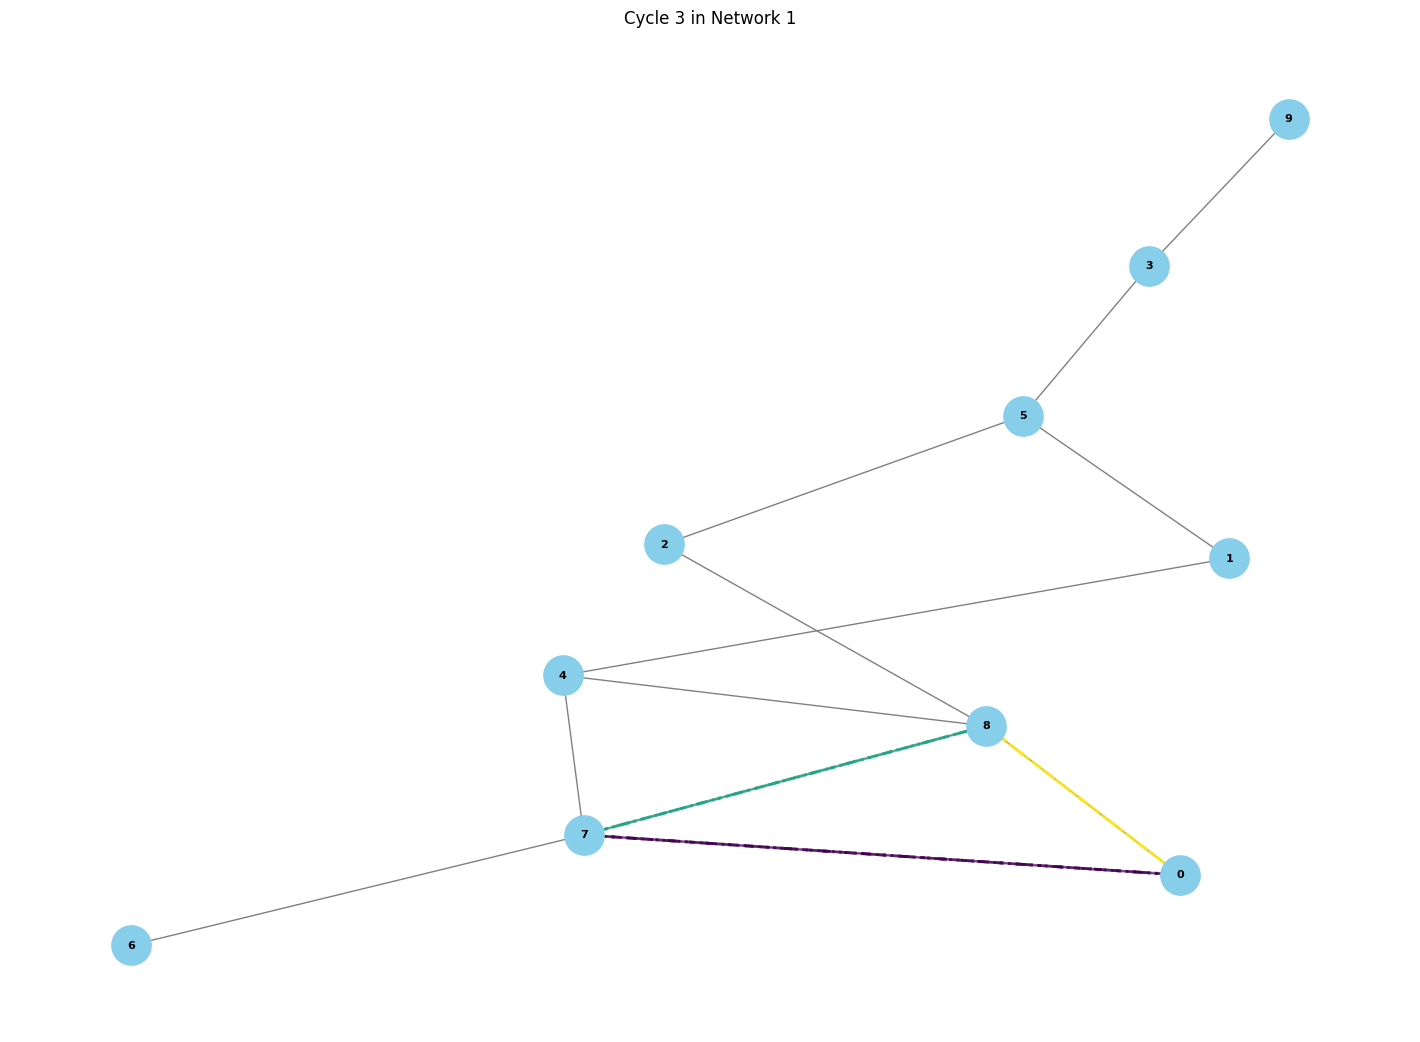

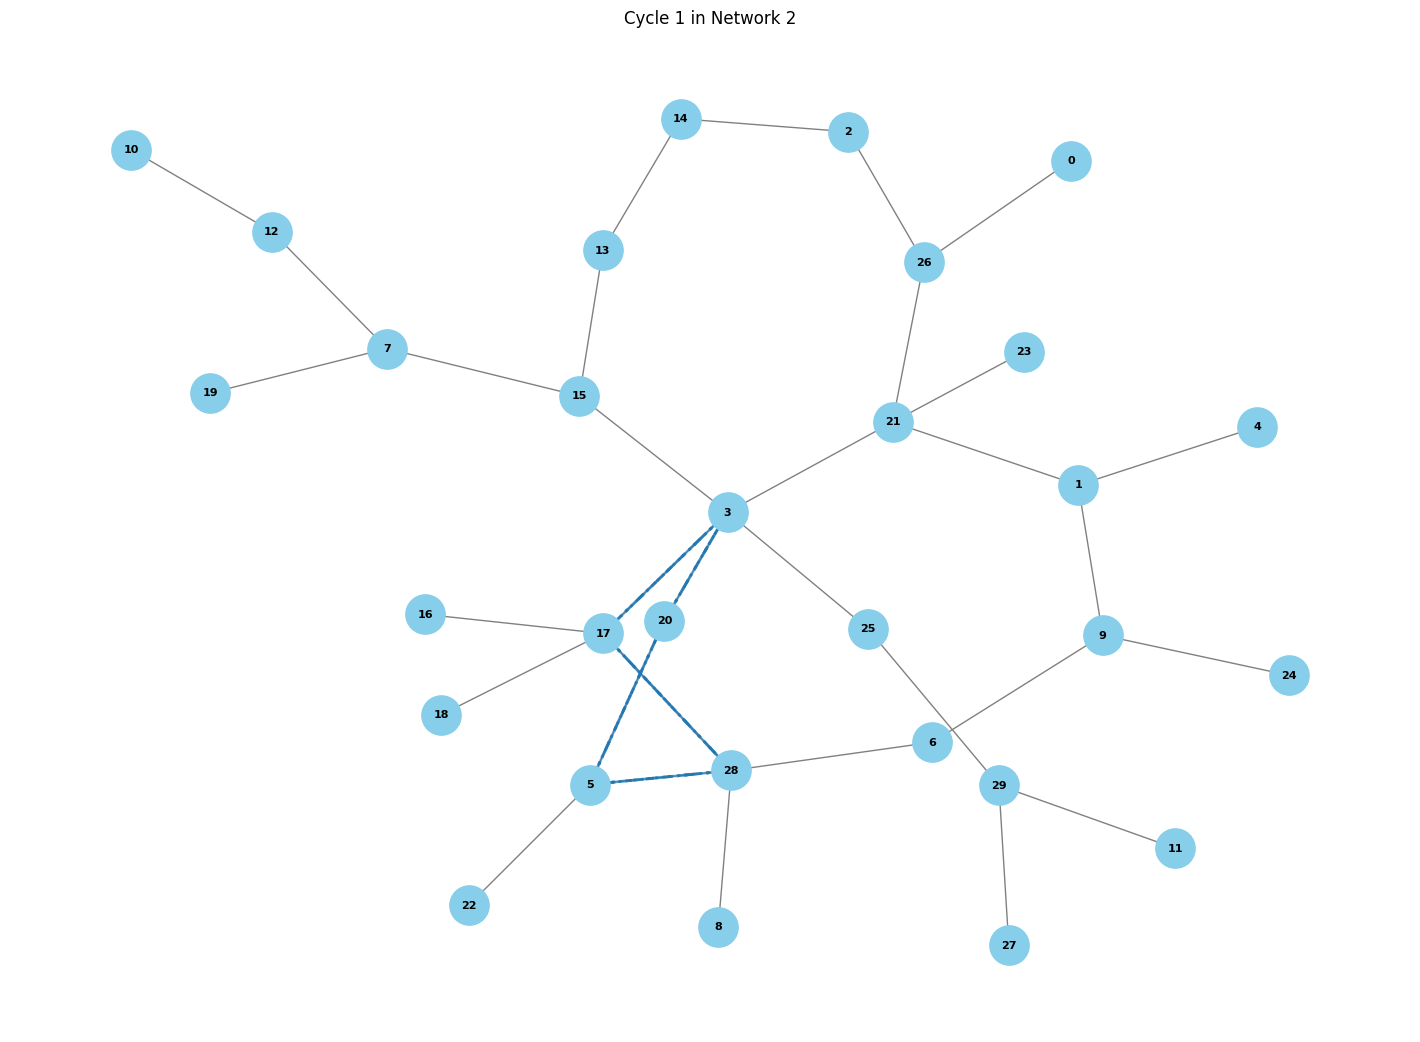

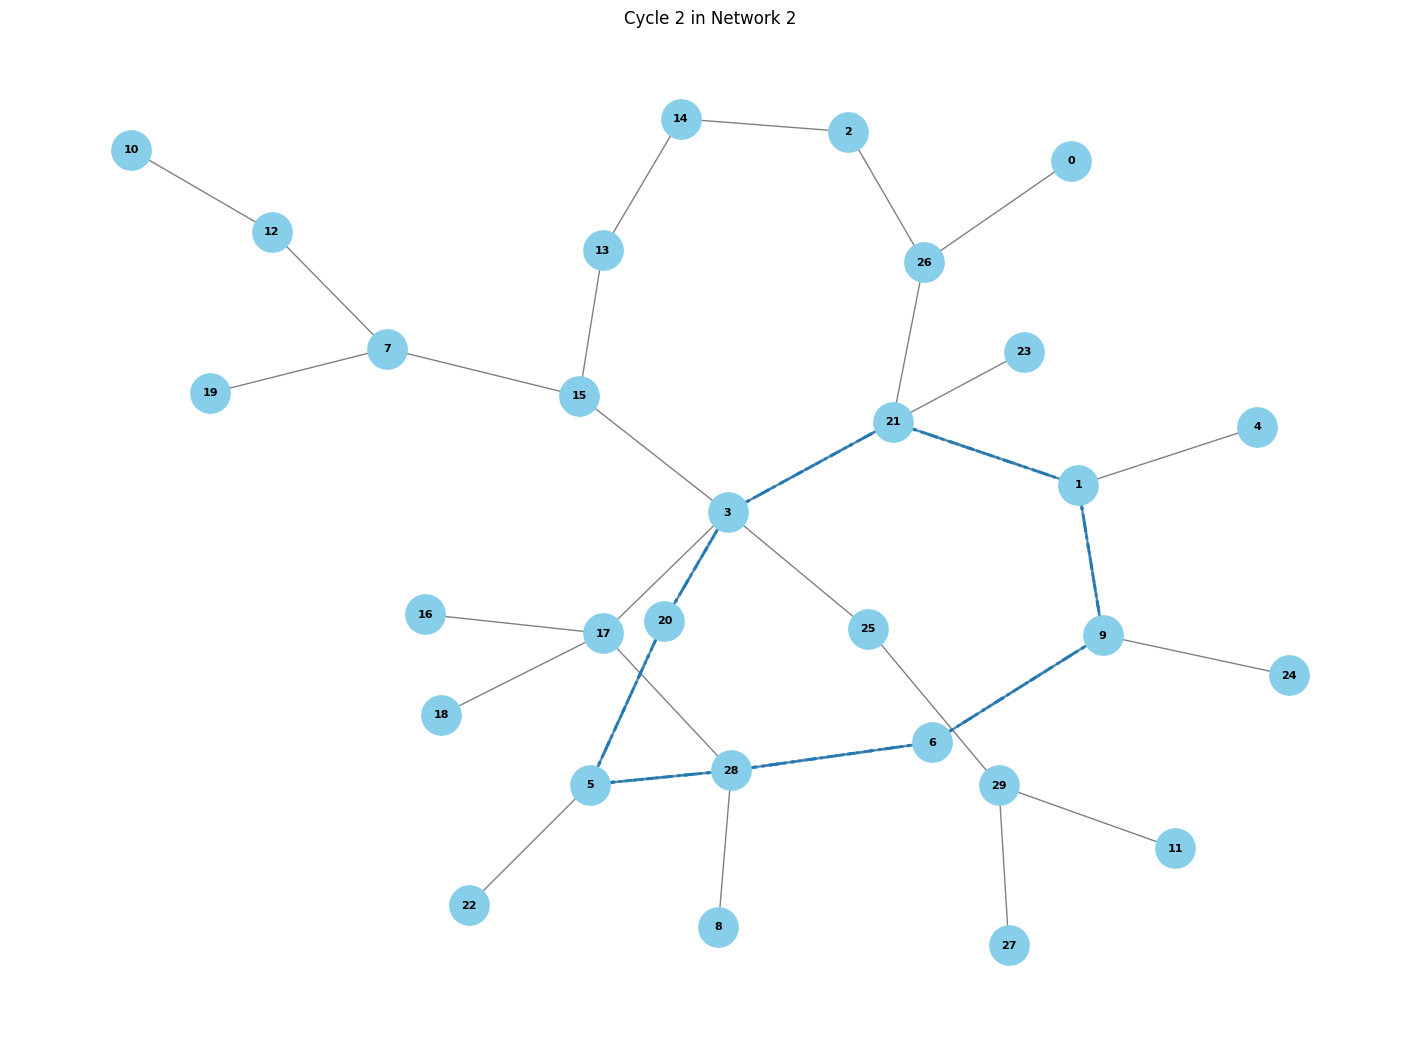

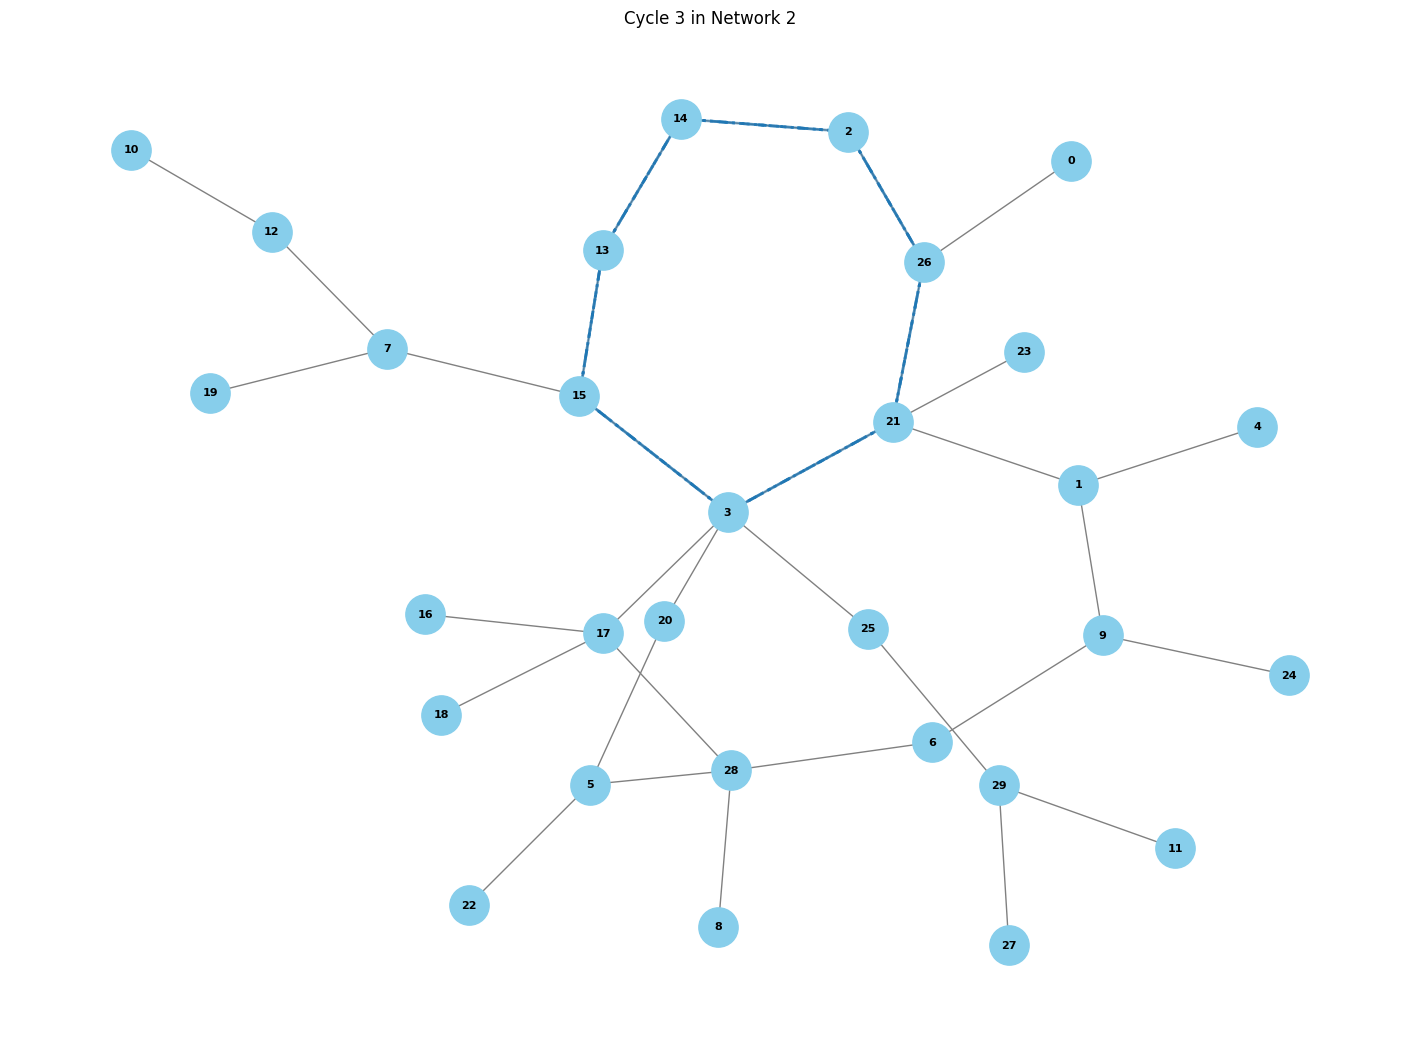

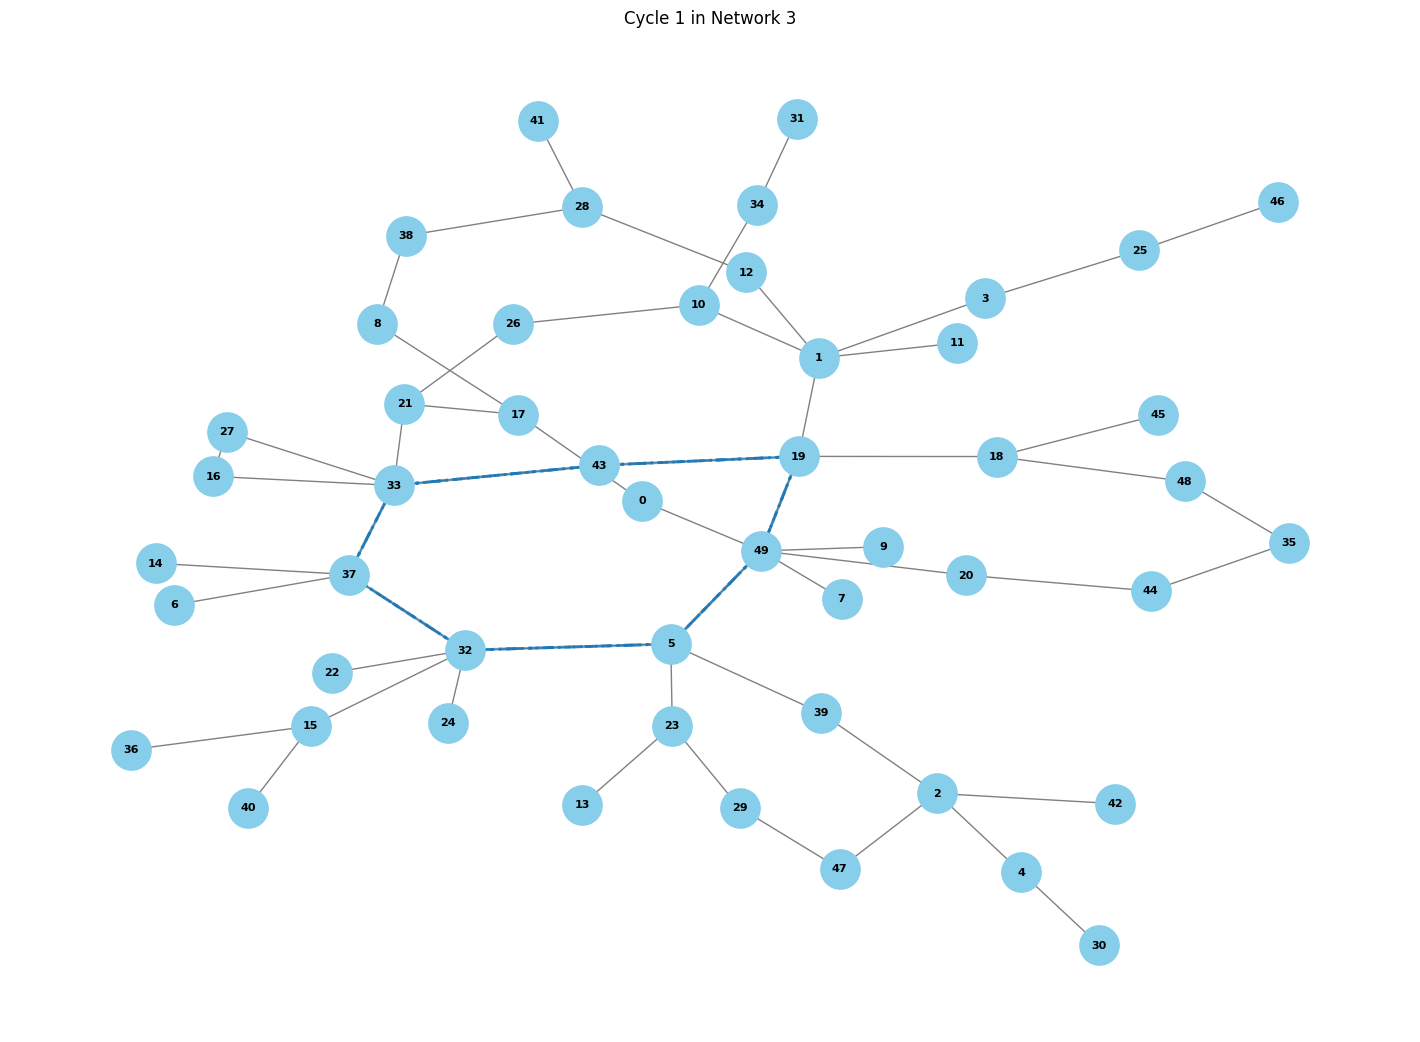

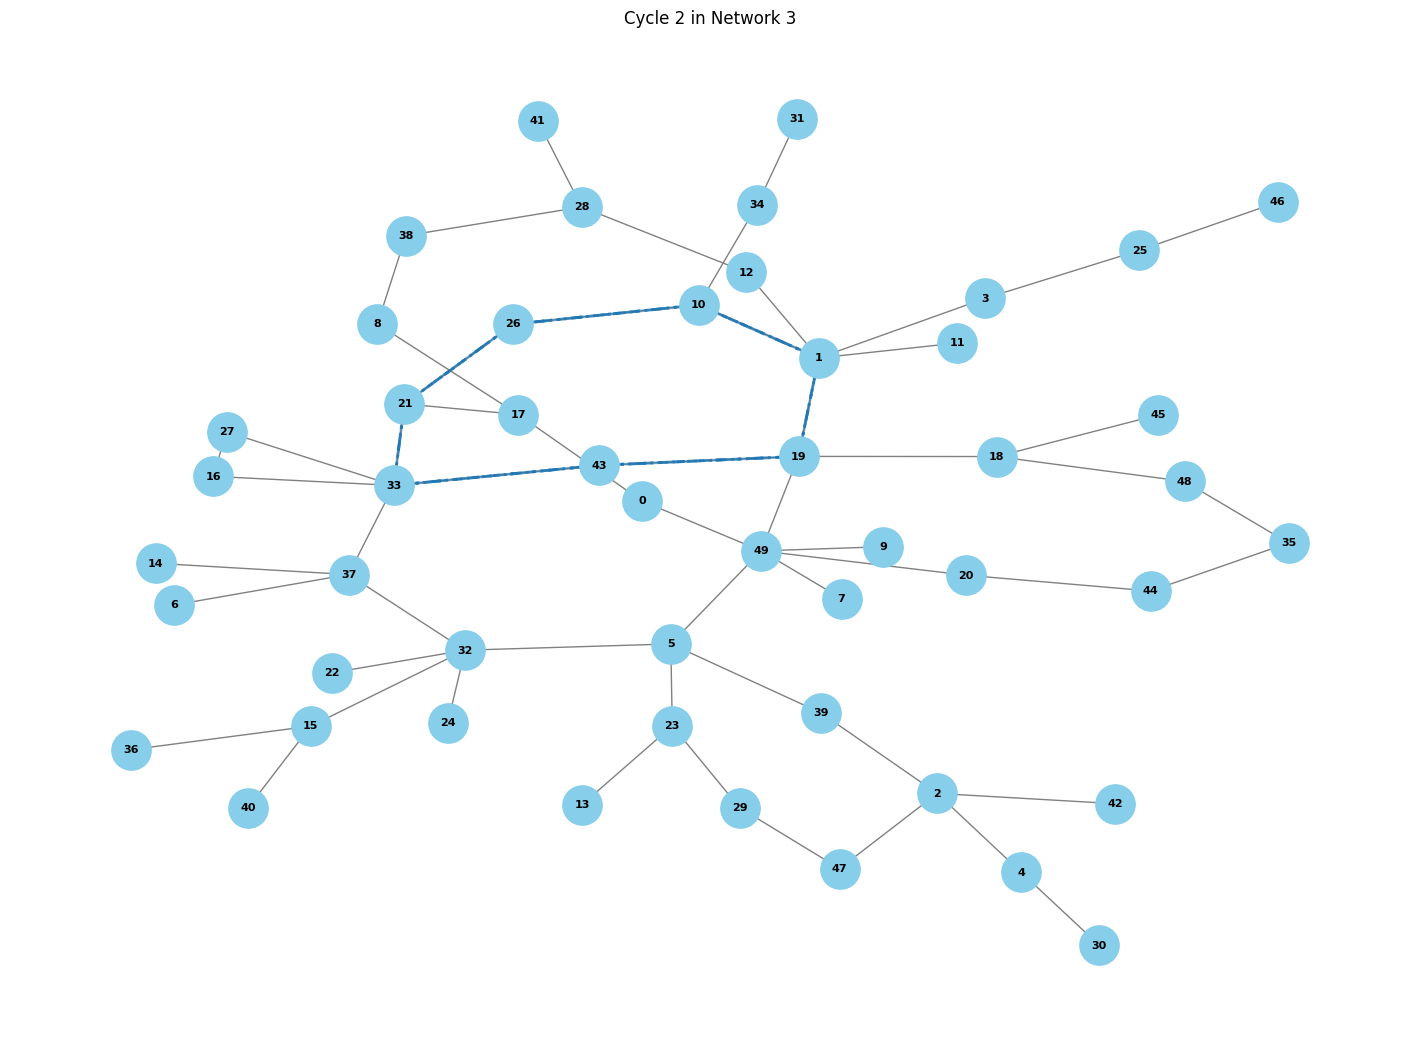

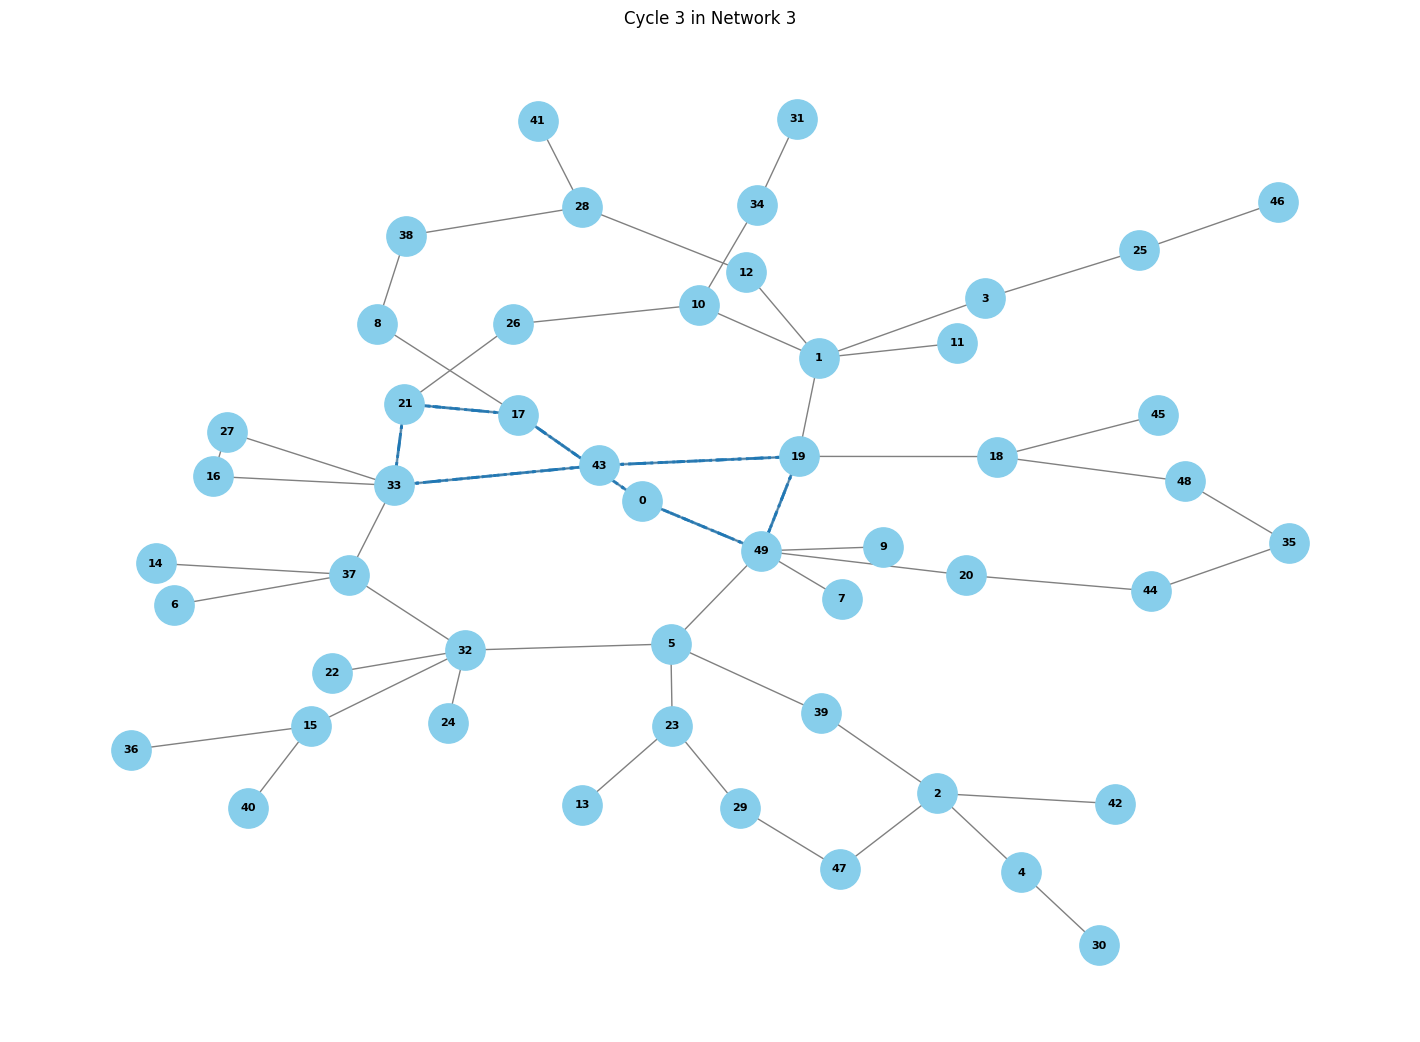

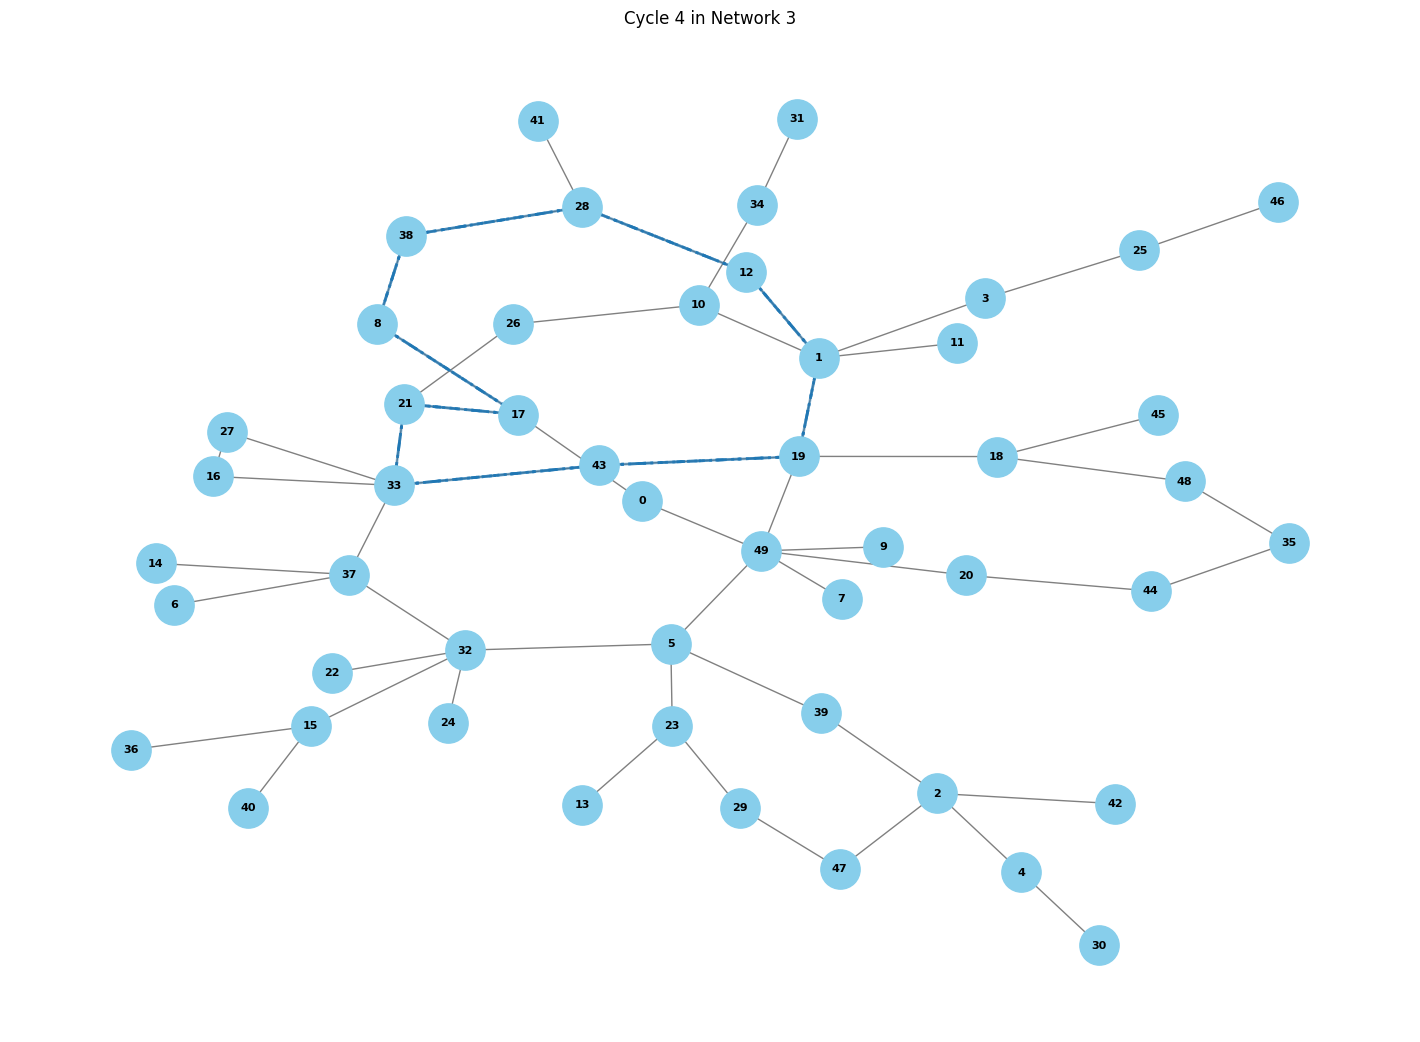

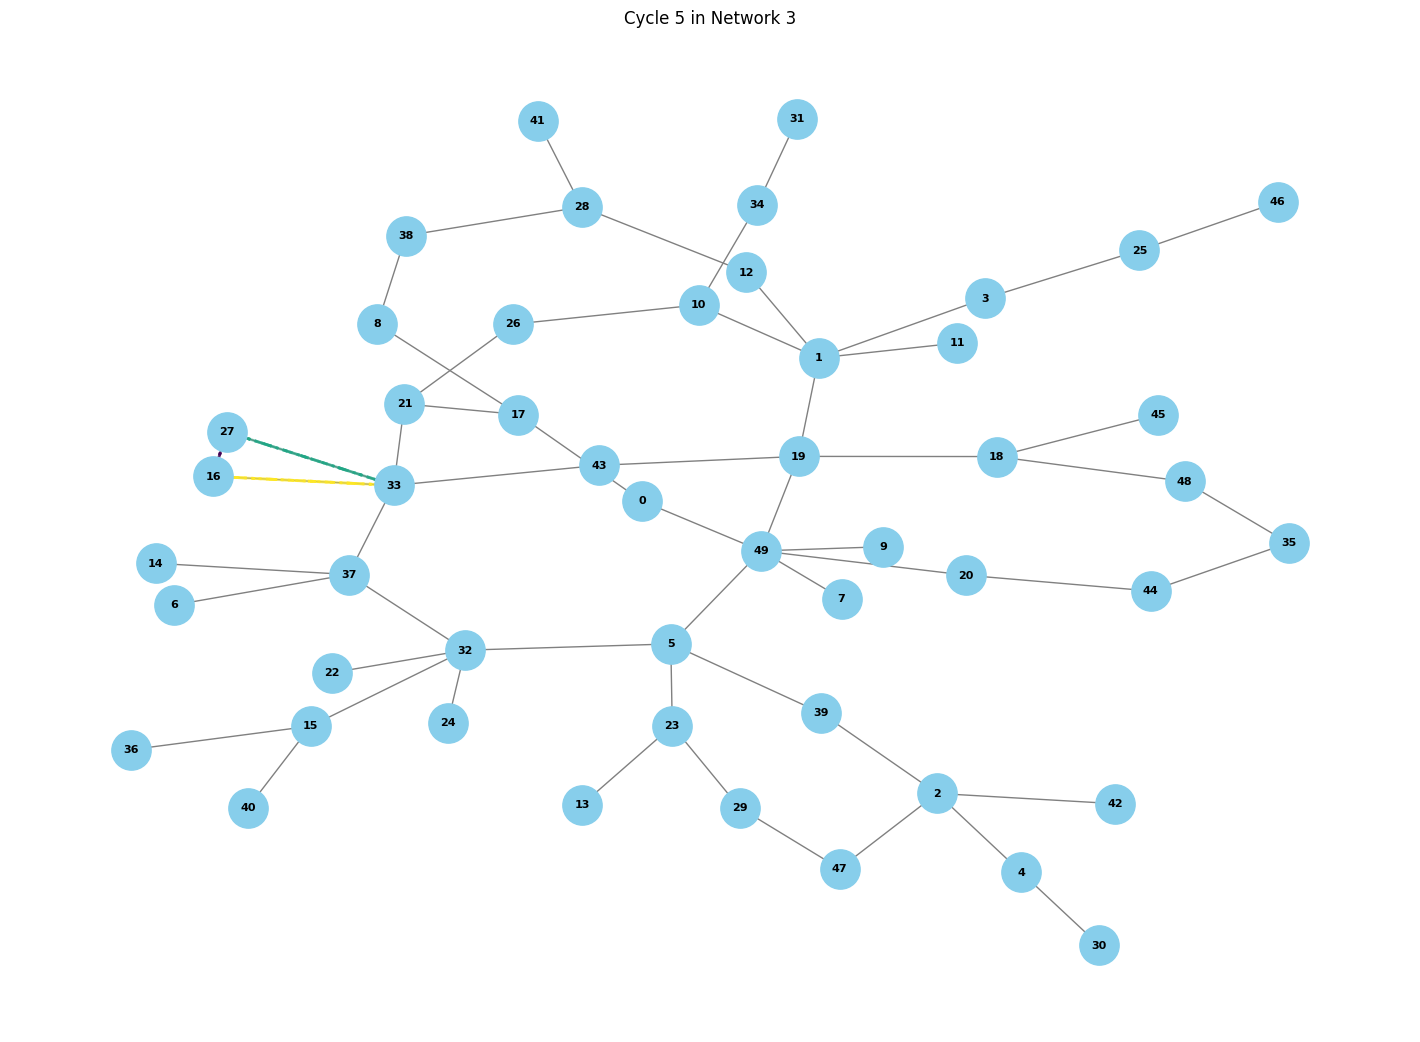

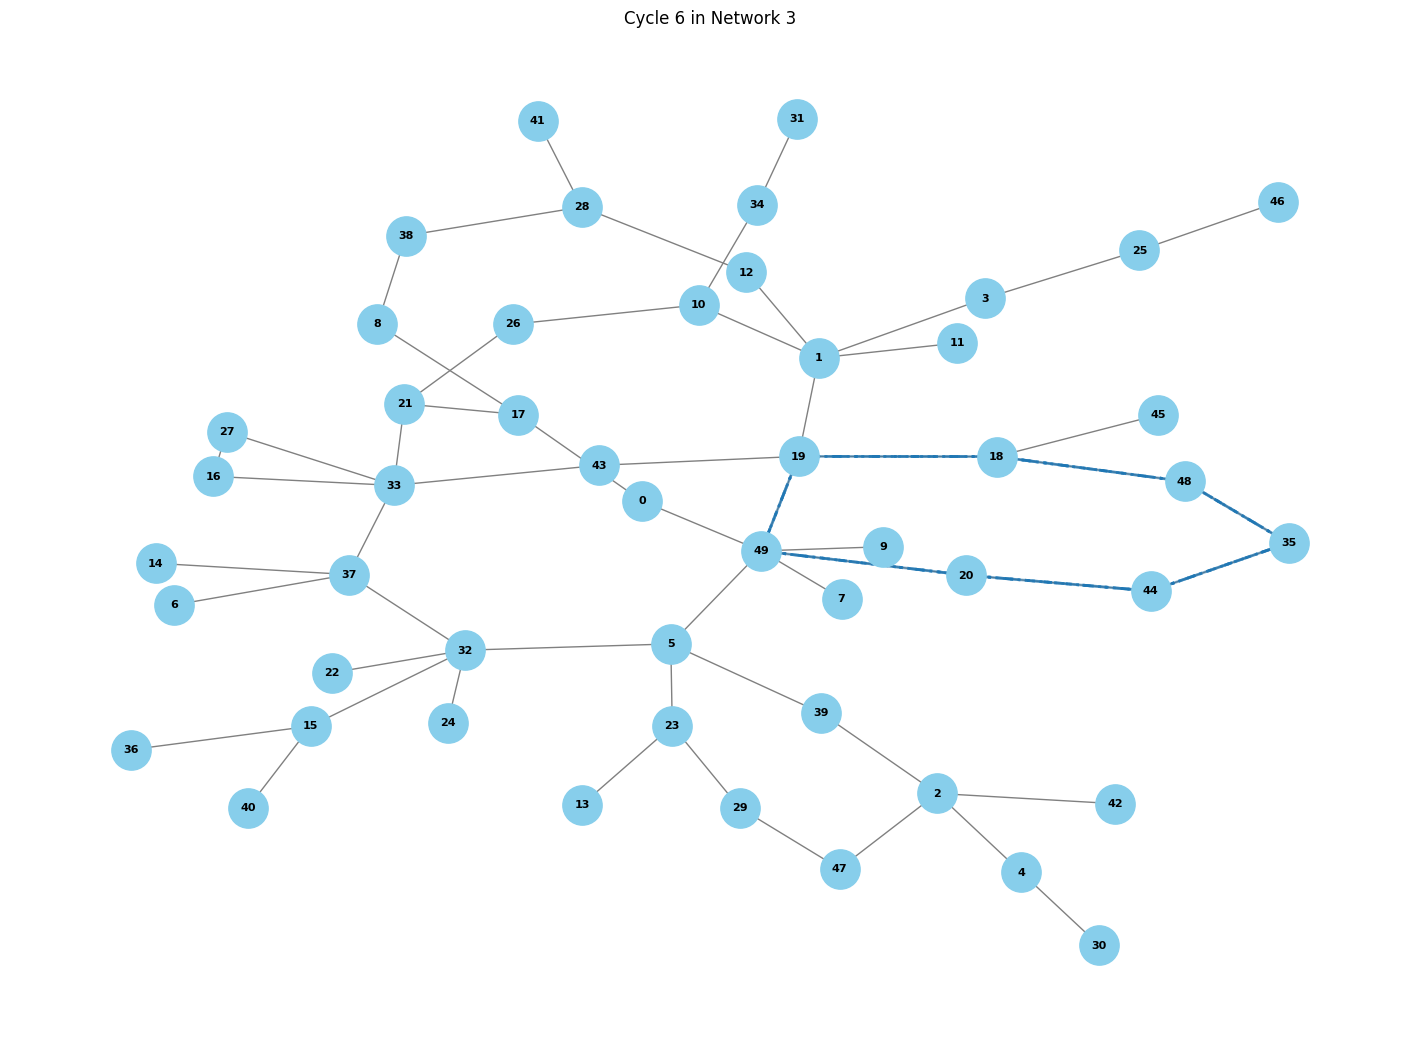

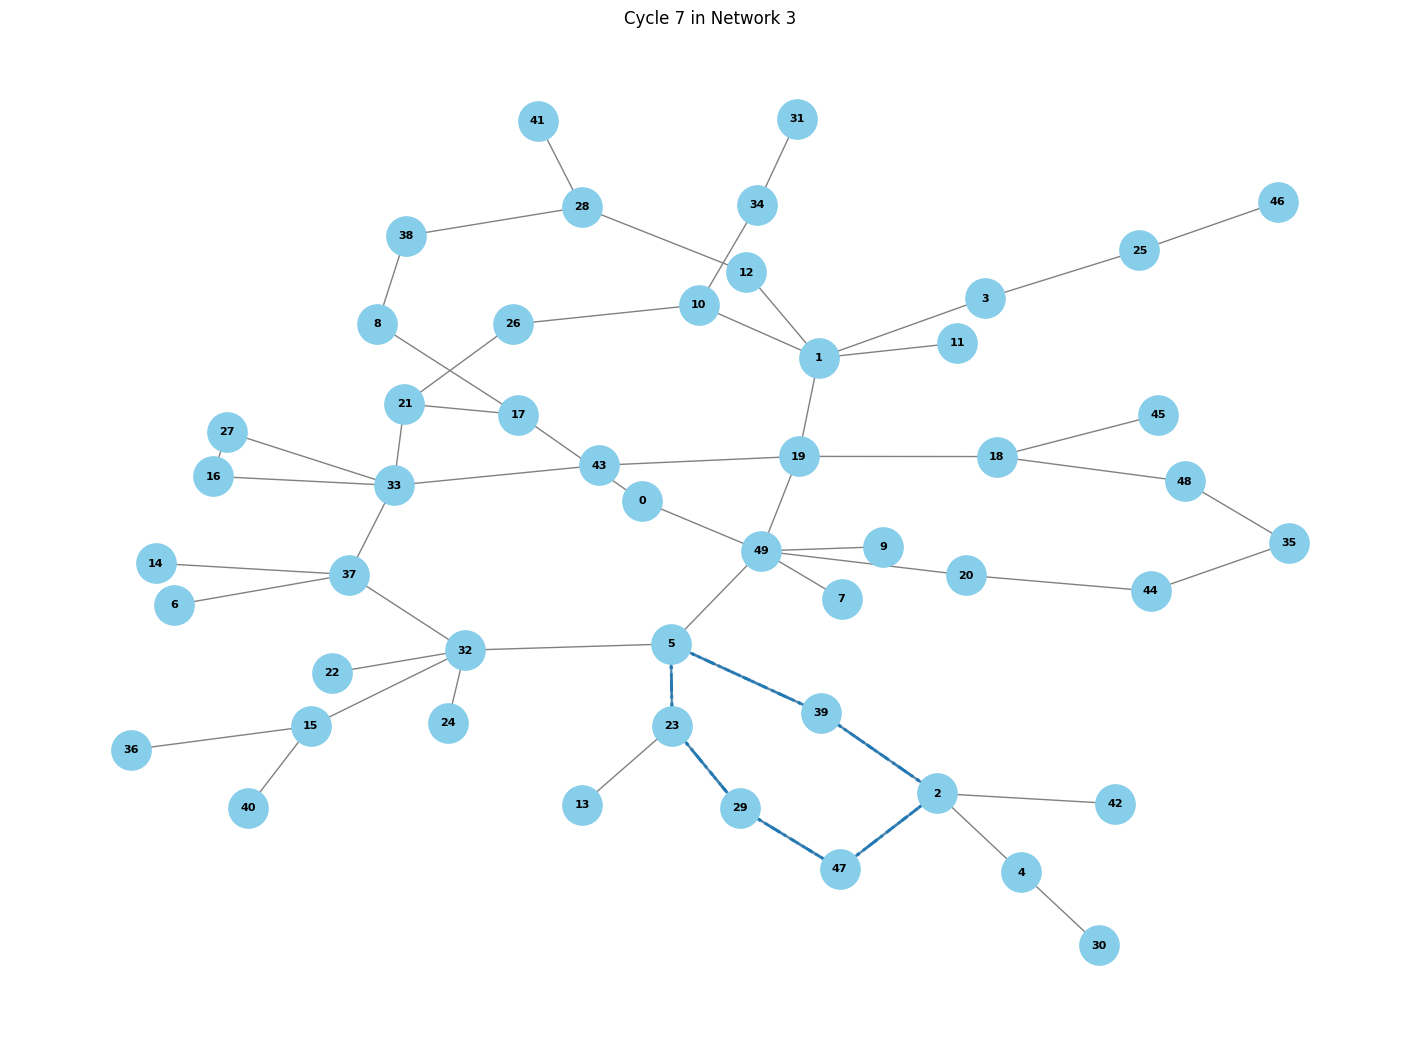

In [2]:
# Define a function to calculate the number of cycles
def calculate_number_of_cycles(graph):
    # Get the number of nodes (v) and edges (e) in the graph
    v = graph.number_of_nodes()
    e = graph.number_of_edges()
    # Calculate the number of sub-graphs (p)
    p = nx.number_connected_components(graph)
    # Calculate the number of cycles (u)
    u = e - v + p
    return u, v, e, p

# Calculate the number of cycles for each transport network
for network_name, network_data in networks.items():
    graph = network_data['graph']
    number_of_cycles, num_nodes, num_edges, num_subgraphs = calculate_number_of_cycles(graph)
    print(f"Network: {network_name}")
    print(f"Number of nodes (v): {num_nodes}")
    print(f"Number of edges (e): {num_edges}")
    print(f"Number of sub-graphs (p): {num_subgraphs}")
    print(f"Number of cycles (u): {number_of_cycles}")
    print()

import networkx as nx
import matplotlib.pyplot as plt

# Function to visualize the graph with cycles colored differently and with unique line styles
def visualize_graph_with_colored_cycles(graph, title, cycles, pos):
    # Create a colormap with a unique color for each cycle
    cycle_colors = plt.cm.tab10.colors[:len(cycles)]

    # Define line styles for each cycle
    line_styles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5))]

    # Increase figure size for better visibility
    plt.figure(figsize=(14, 10))

    # Draw the graph with nodes and edges
    nx.draw(graph, pos=pos, with_labels=True, node_color='skyblue', node_size=800,
            font_size=8, font_weight='bold', edge_color='gray')  # Default edge color is gray

    # Draw the edges for each cycle in two passes
    for i, (cycle, color) in enumerate(zip(cycles, cycle_colors)):
        cycle_edges = [(cycle[i], cycle[i + 1]) for i in range(len(cycle) - 1)]
        cycle_edges.append((cycle[-1], cycle[0]))  # Closing the cycle

        # Draw edges with less visible line styles first
        for style_index, style in enumerate(line_styles[:-1]):
            nx.draw_networkx_edges(graph, pos=pos, edgelist=cycle_edges, edge_color=color,
                                   width=2.0, style=style, alpha=0.5)  # Use alpha to make lines less visible

        # Draw edges with the bolder line style (last style in the list)
        nx.draw_networkx_edges(graph, pos=pos, edgelist=cycle_edges, edge_color=color,
                               width=2.0, style=line_styles[-1])

    # Display the plot
    plt.title(title)
    plt.show()

# Visualize cycles in each network with different colors and line styles
for network_name, network_data in networks.items():
    graph = network_data['graph']
    pos = network_data['pos']
    cycles = nx.cycle_basis(graph)  # Get a list of cycles
    title = f"Cycles in {network_name}"
    visualize_graph_with_colored_cycles(graph, title, cycles, pos)

    # Function to visualize the graph with cycles colored differently and with unique line styles
def visualize_graph_with_colored_cycles(graph, title, cycle, pos):
    # Create a colormap with a unique color for the cycle
    cycle_color = plt.cm.tab10.colors[0]  # Choose the first color in the tab10 colormap

    # Define line styles for the cycle
    line_styles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5))]

    # Increase figure size for better visibility
    plt.figure(figsize=(14, 10))

    # Draw the graph with nodes and edges
    nx.draw(graph, pos=pos, with_labels=True, node_color='skyblue', node_size=800,
            font_size=8, font_weight='bold', edge_color='gray')  # Default edge color is gray

    # Draw the edges for the cycle in two passes
    cycle_edges = [(cycle[i], cycle[i + 1]) for i in range(len(cycle) - 1)]
    cycle_edges.append((cycle[-1], cycle[0]))  # Closing the cycle

    # Draw edges with less visible line styles first
    for style_index, style in enumerate(line_styles[:-1]):
        nx.draw_networkx_edges(graph, pos=pos, edgelist=cycle_edges, edge_color=cycle_color,
                               width=2.0, style=style, alpha=0.5)  # Use alpha to make lines less visible

    # Draw edges with the bolder line style (last style in the list)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cycle_edges, edge_color=cycle_color,
                           width=2.0, style=line_styles[-1])

    # Display the plot
    plt.title(title)
    plt.show()

# Iterate through all networks and visualize all cycles in each
for network_name, network_data in networks.items():
    graph = network_data['graph']
    pos = network_data['pos']
    cycles = nx.cycle_basis(graph)  # Get a list of cycles
    if cycles:  # Check if there are cycles
        for i, cycle in enumerate(cycles):
            title = f"Cycle {i+1} in {network_name}"
            visualize_graph_with_colored_cycles(graph, title, cycle, pos)
    else:
        print(f"No cycles found in {network_name}")





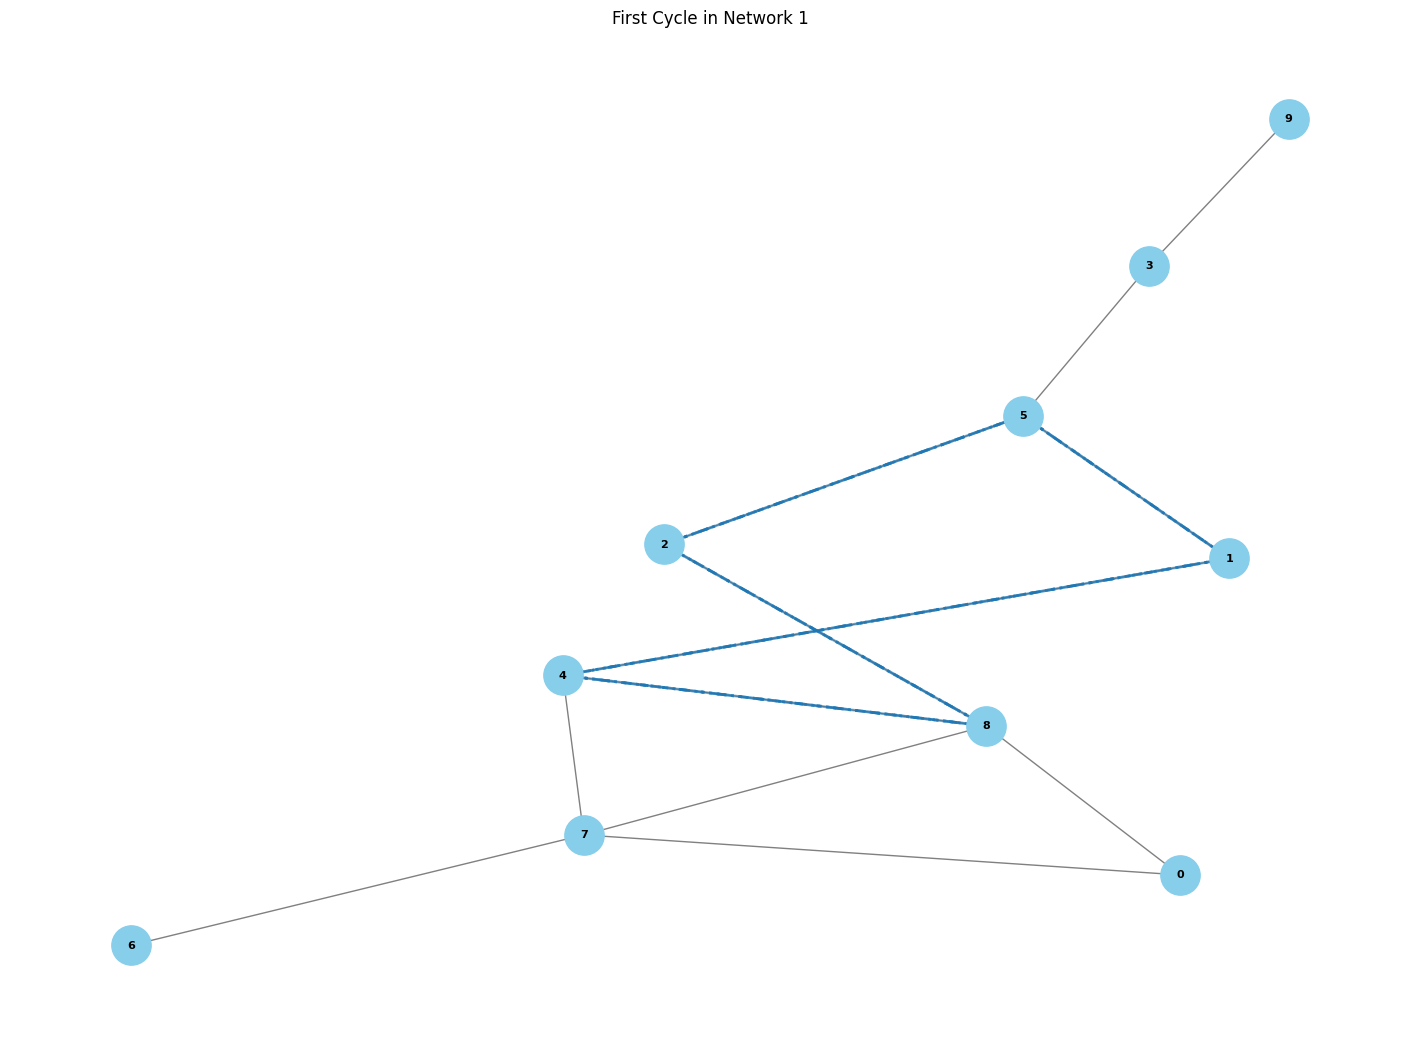

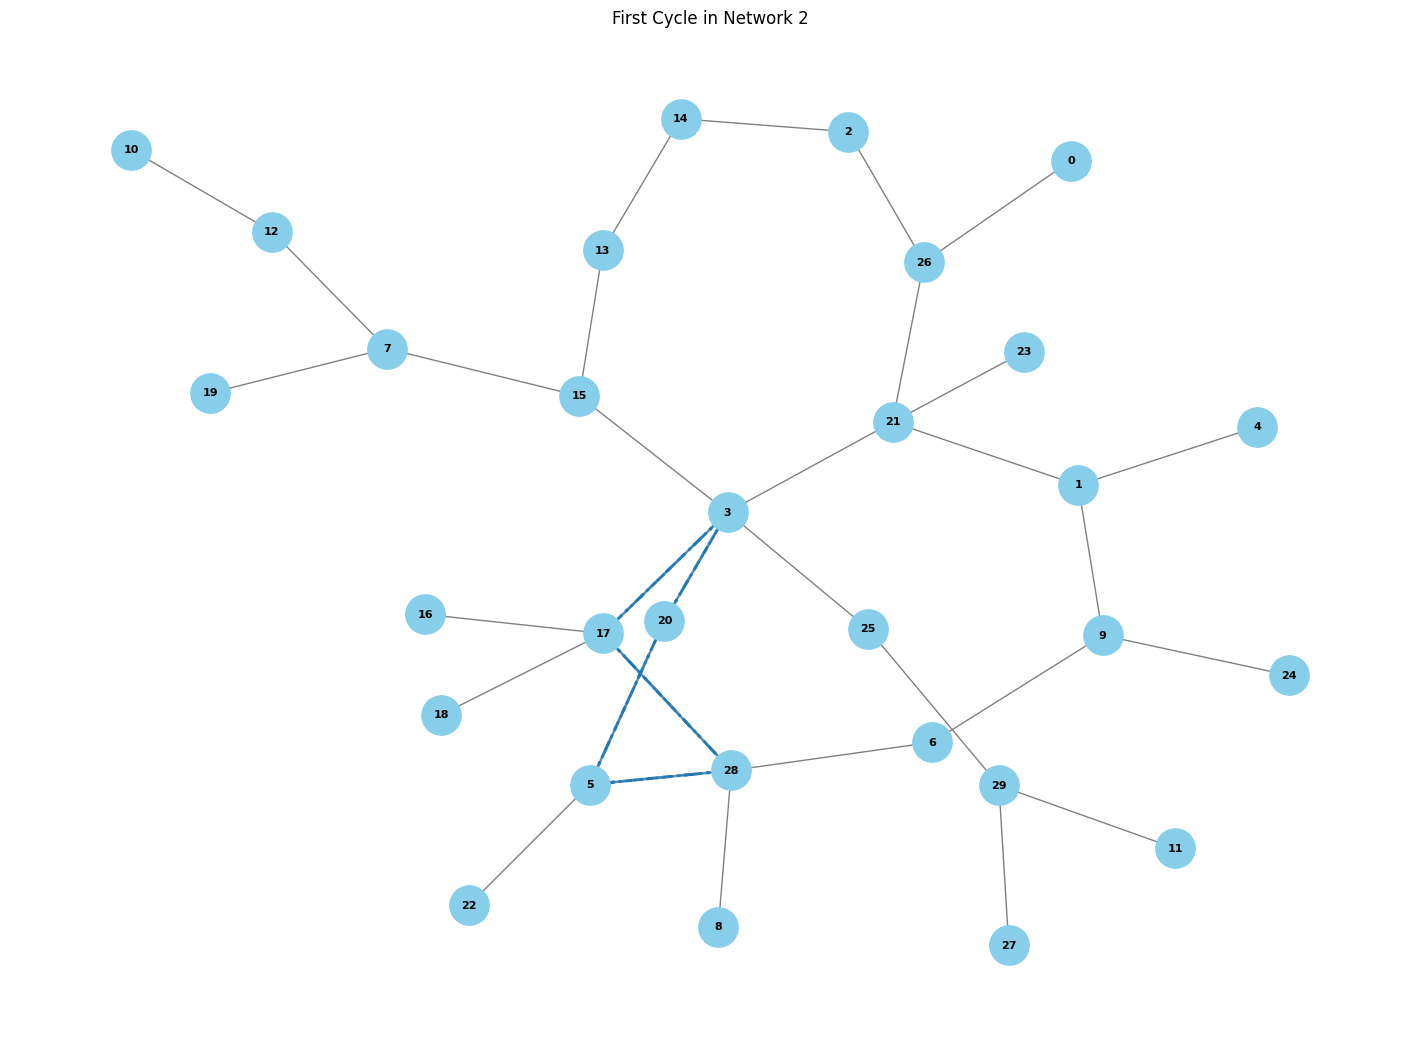

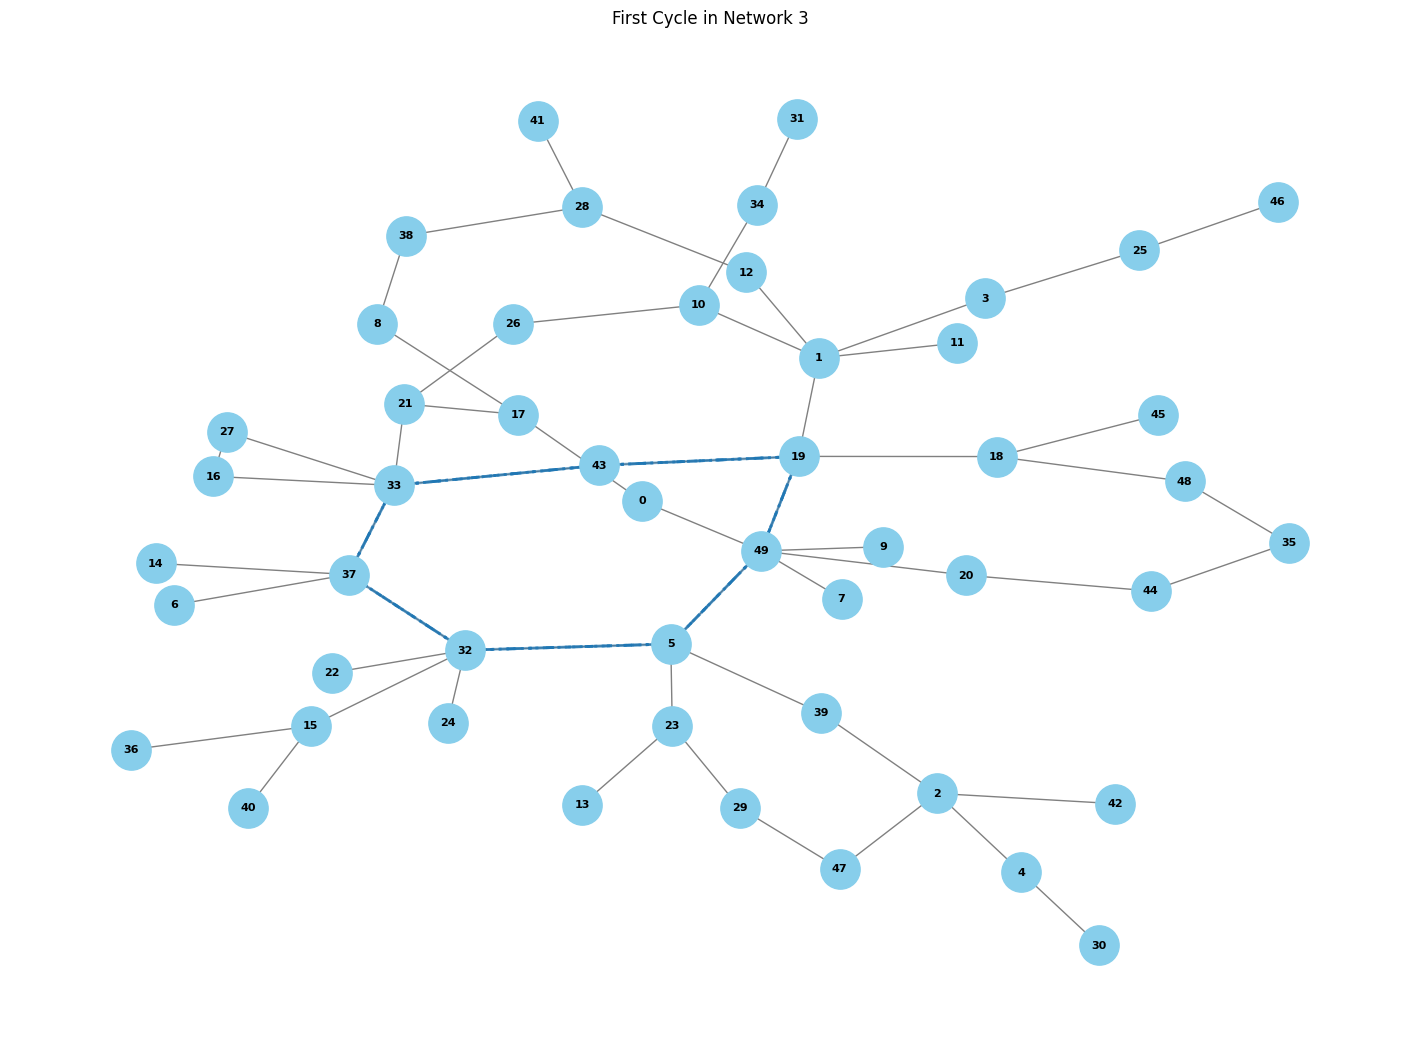

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to visualize the graph with cycles colored differently and with unique line styles
def visualize_graph_with_colored_cycles(graph, title, cycle, pos):
    # Create a colormap with a unique color for the cycle
    cycle_color = plt.cm.tab10.colors[0]  # Choose the first color in the tab10 colormap

    # Define line styles for the cycle
    line_styles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5))]

    # Increase figure size for better visibility
    plt.figure(figsize=(14, 10))

    # Draw the graph with nodes and edges
    nx.draw(graph, pos=pos, with_labels=True, node_color='skyblue', node_size=800,
            font_size=8, font_weight='bold', edge_color='gray')  # Default edge color is gray

    # Draw the edges for the cycle in two passes
    cycle_edges = [(cycle[i], cycle[i + 1]) for i in range(len(cycle) - 1)]
    cycle_edges.append((cycle[-1], cycle[0]))  # Closing the cycle

    # Draw edges with less visible line styles first
    for style_index, style in enumerate(line_styles[:-1]):
        nx.draw_networkx_edges(graph, pos=pos, edgelist=cycle_edges, edge_color=cycle_color,
                               width=2.0, style=style, alpha=0.5)  # Use alpha to make lines less visible

    # Draw edges with the bolder line style (last style in the list)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cycle_edges, edge_color=cycle_color,
                           width=2.0, style=line_styles[-1])

    # Display the plot
    plt.title(title)
    plt.show()

# Iterate through all networks and visualize the first cycle in each
for network_name, network_data in networks.items():
    graph = network_data['graph']
    pos = network_data['pos']
    cycles = nx.cycle_basis(graph)  # Get a list of cycles
    if cycles:  # Check if there are cycles
        first_cycle = cycles[0]  # Get the first cycle
        title = f"First Cycle in {network_name}"
        visualize_graph_with_colored_cycles(graph, title, first_cycle, pos)
    else:
        print(f"No cycles found in {network_name}")



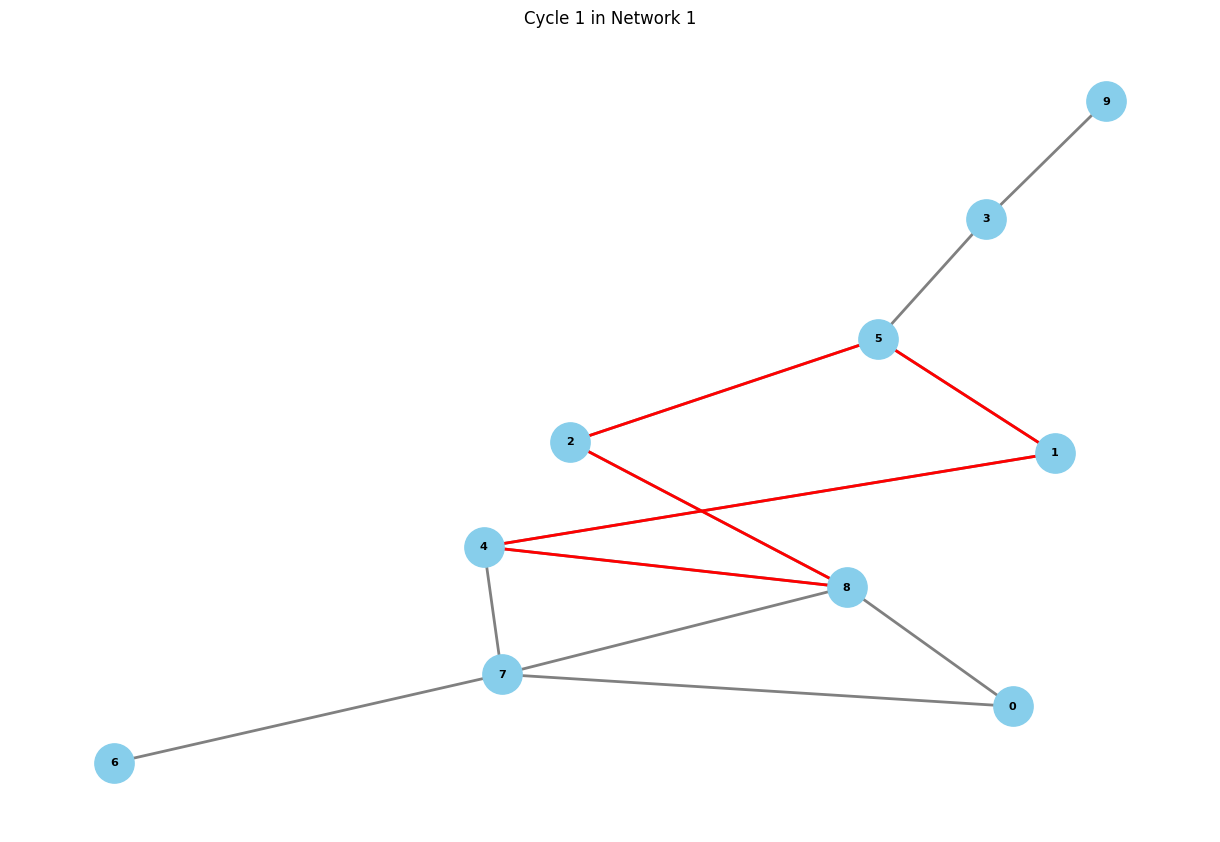

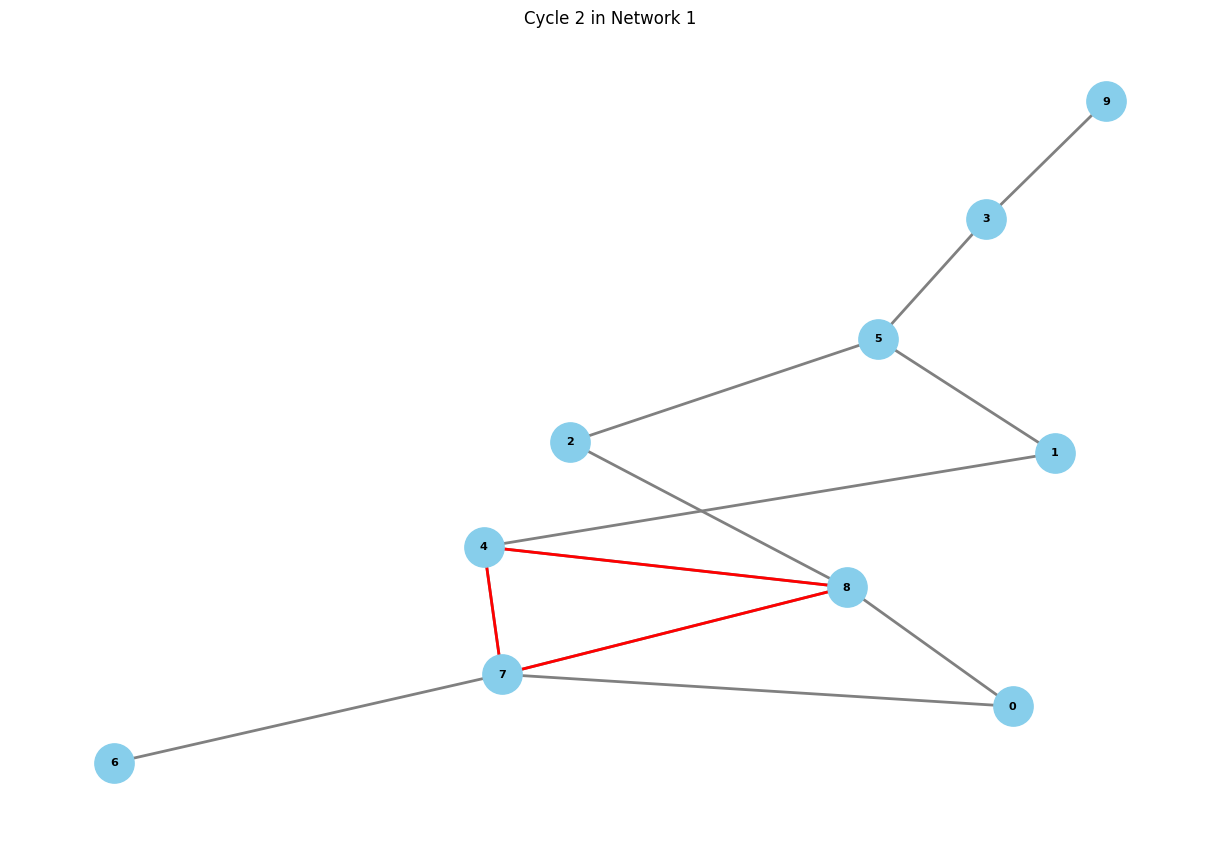

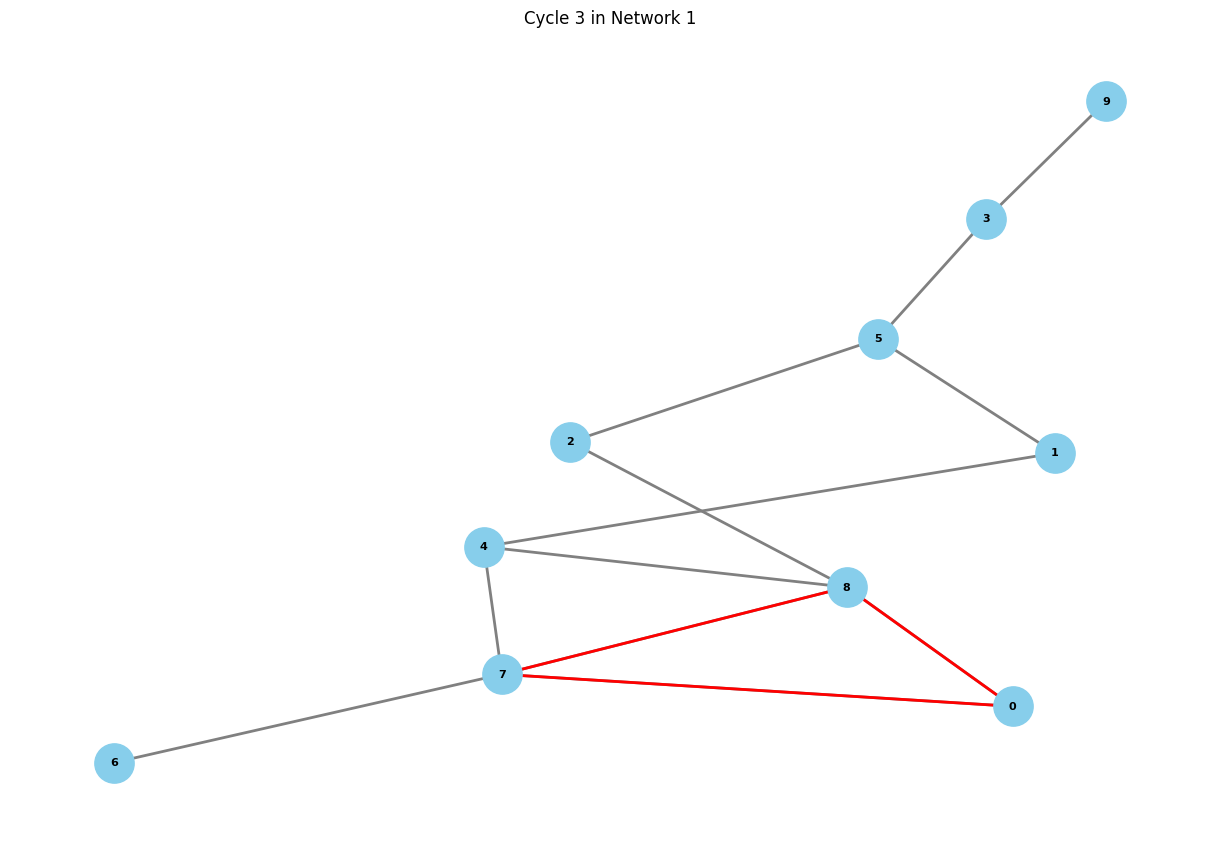

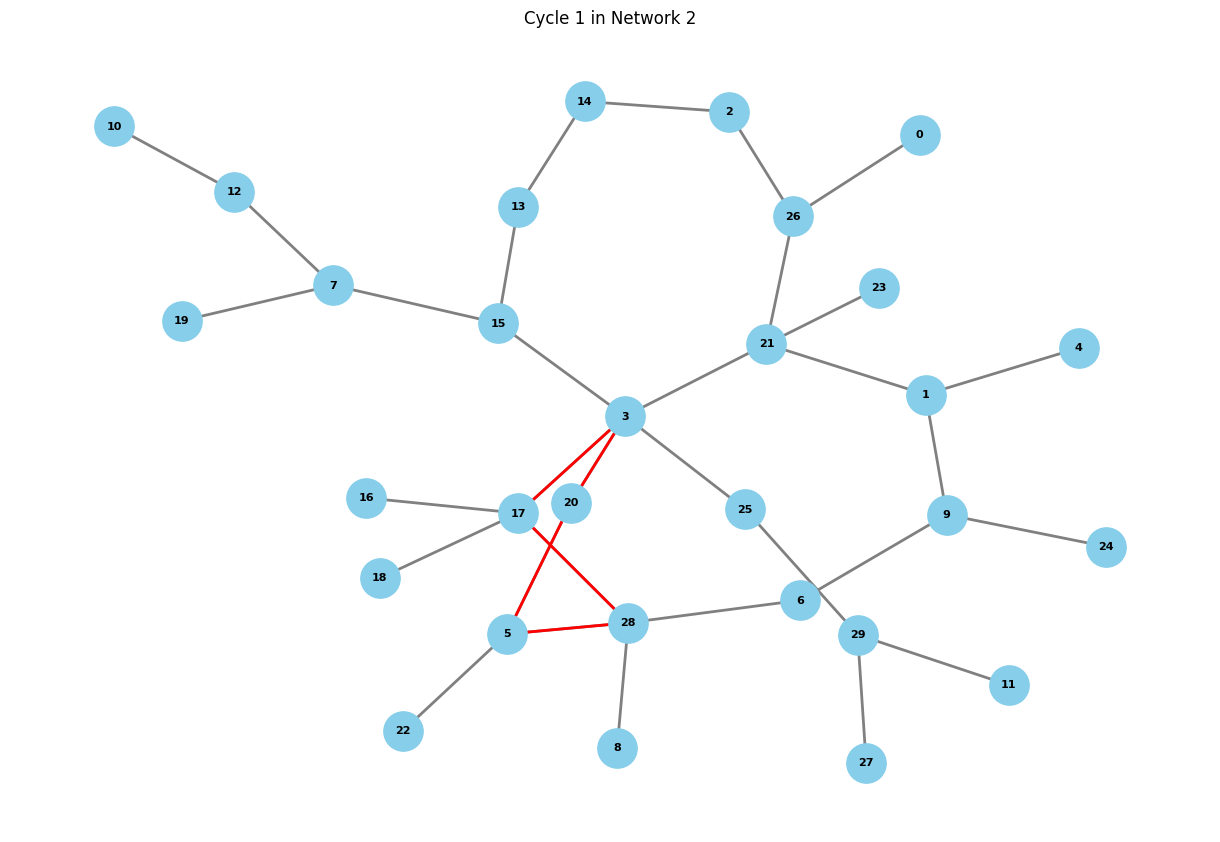

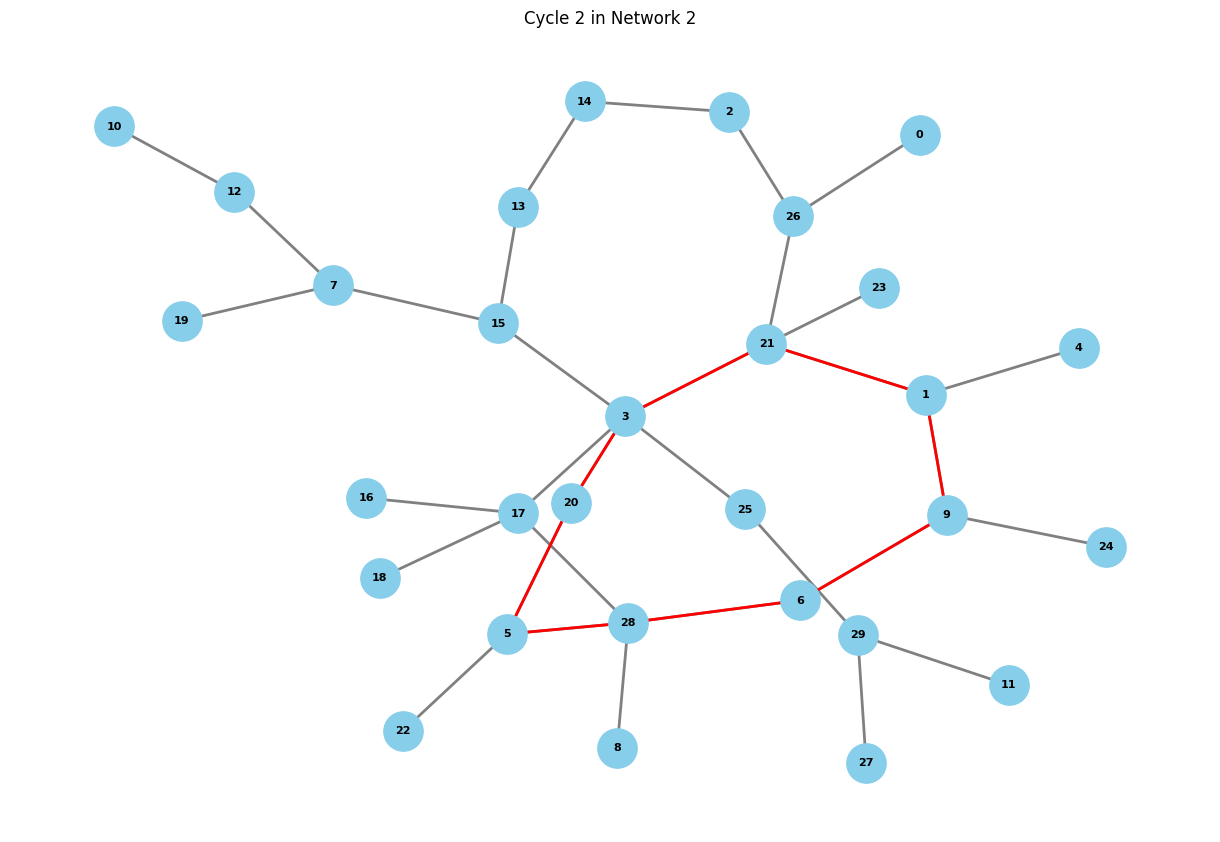

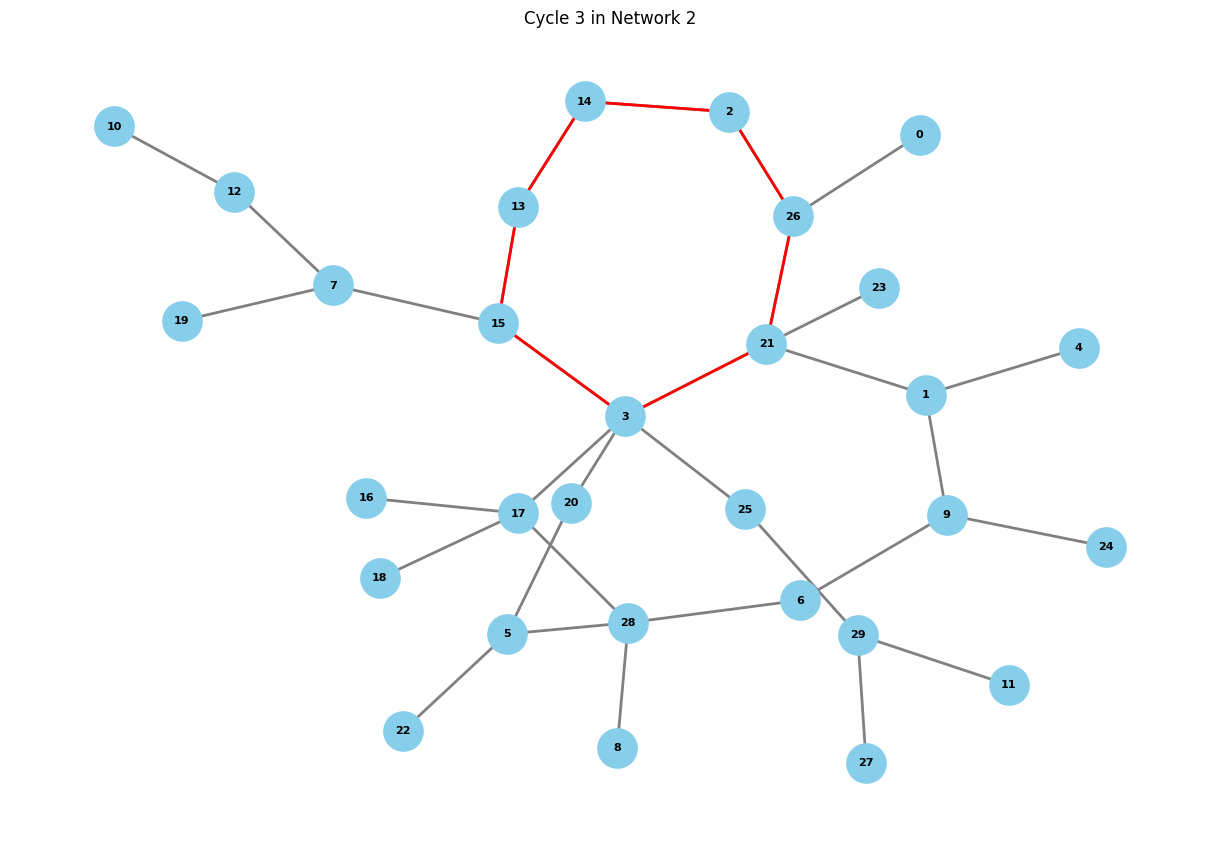

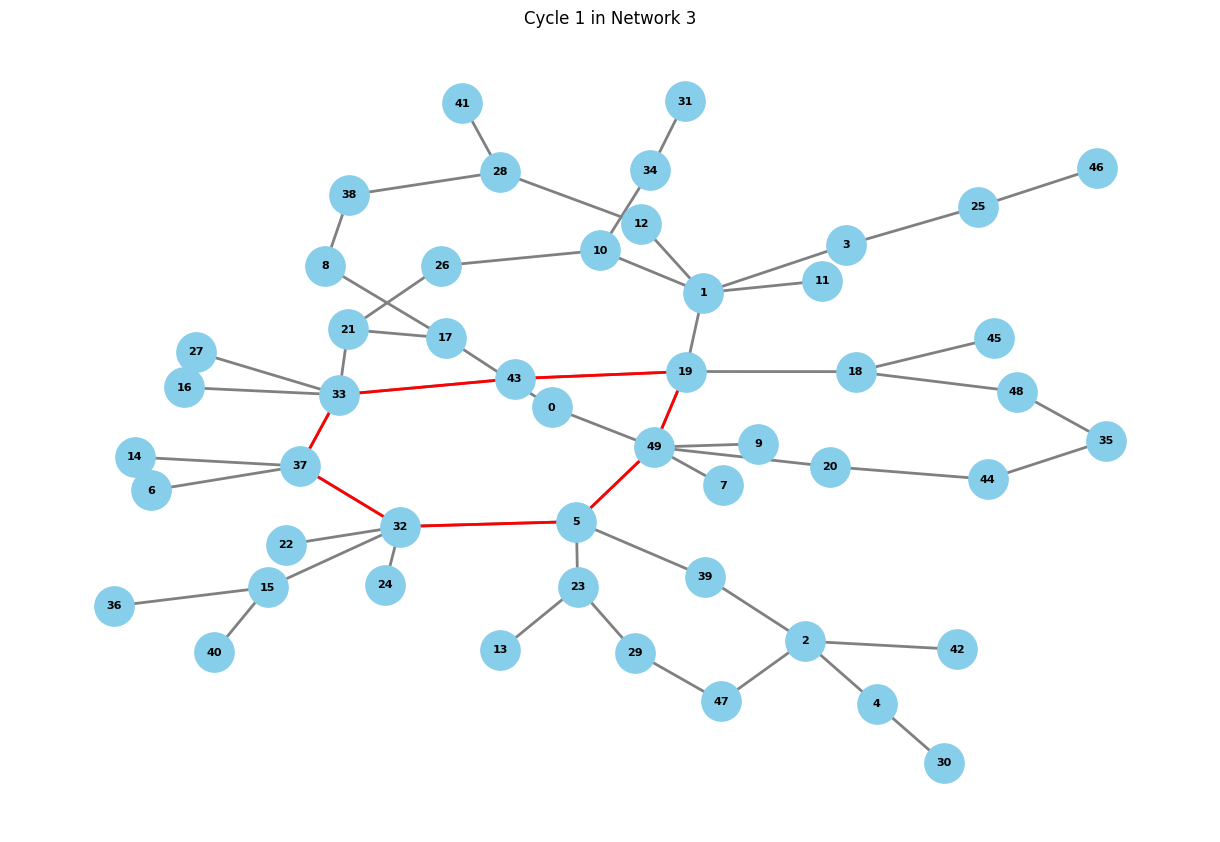

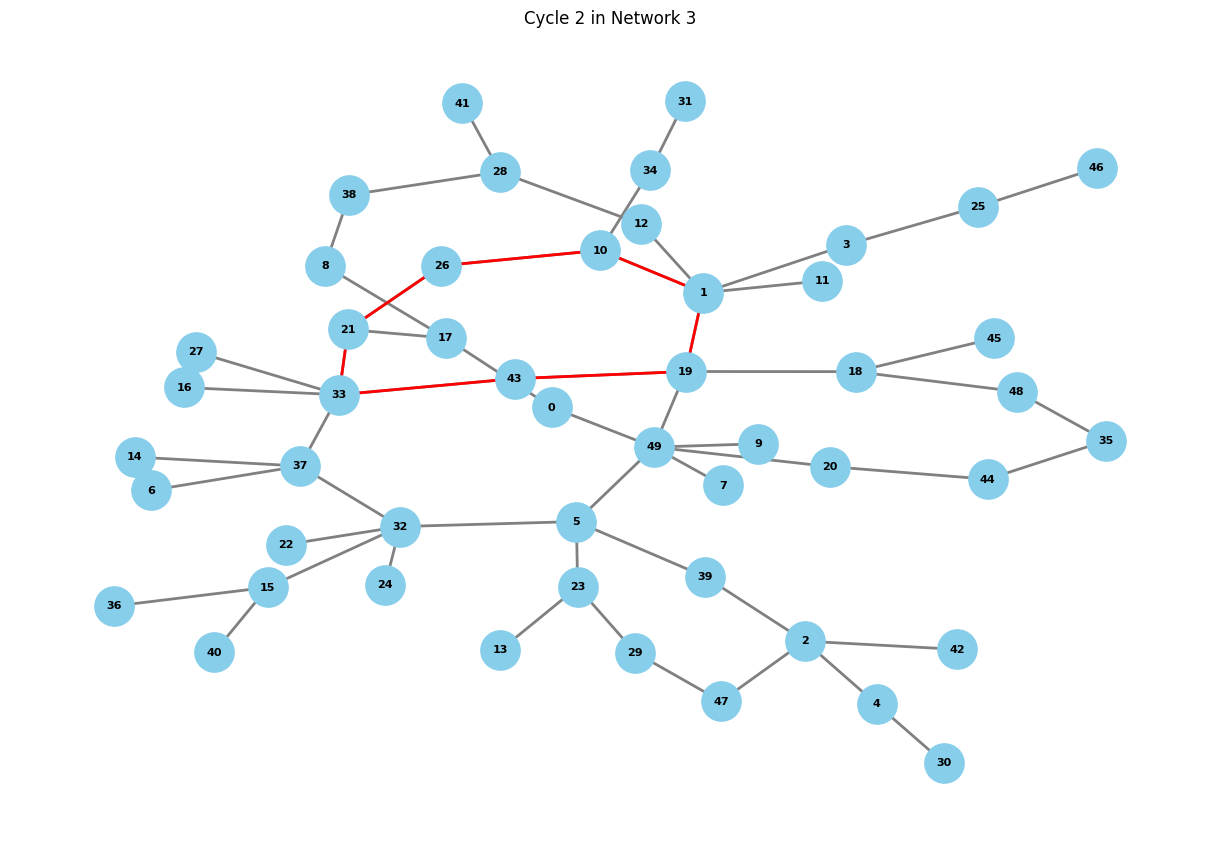

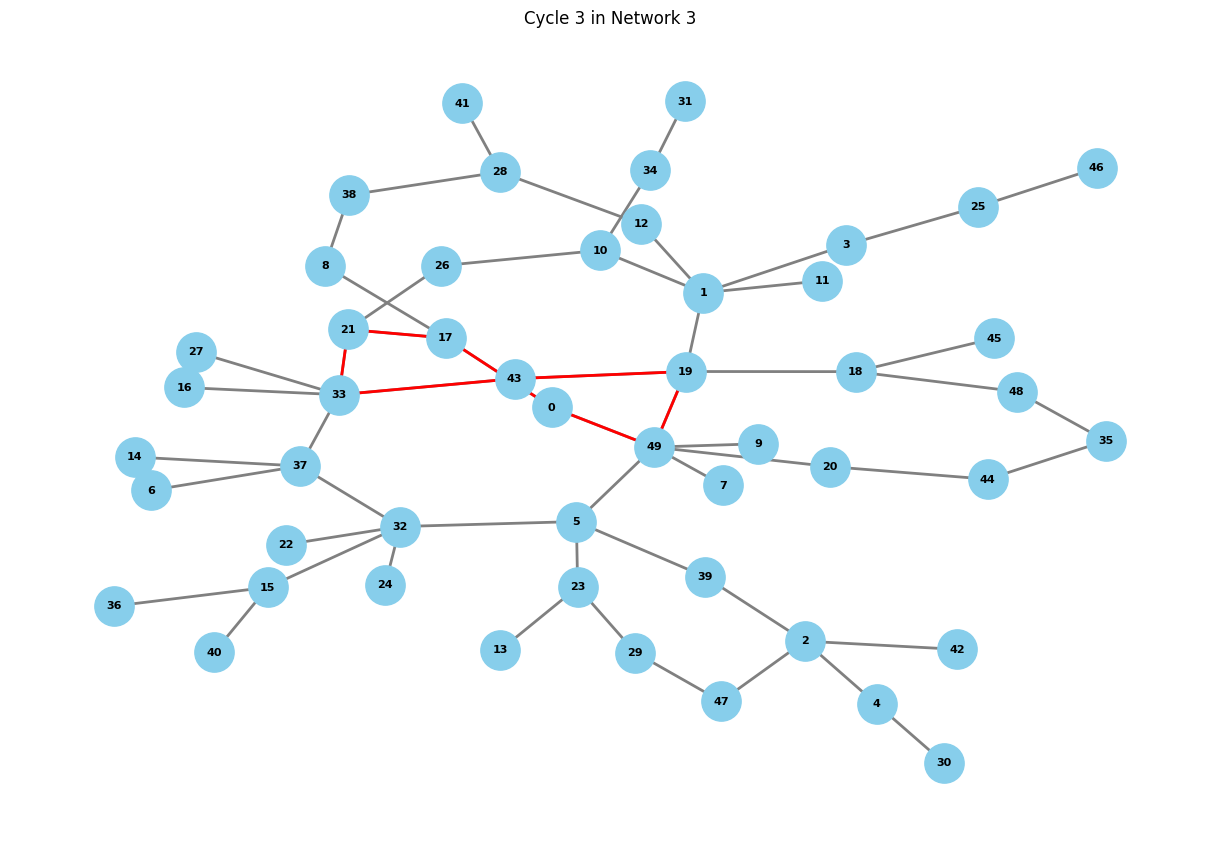

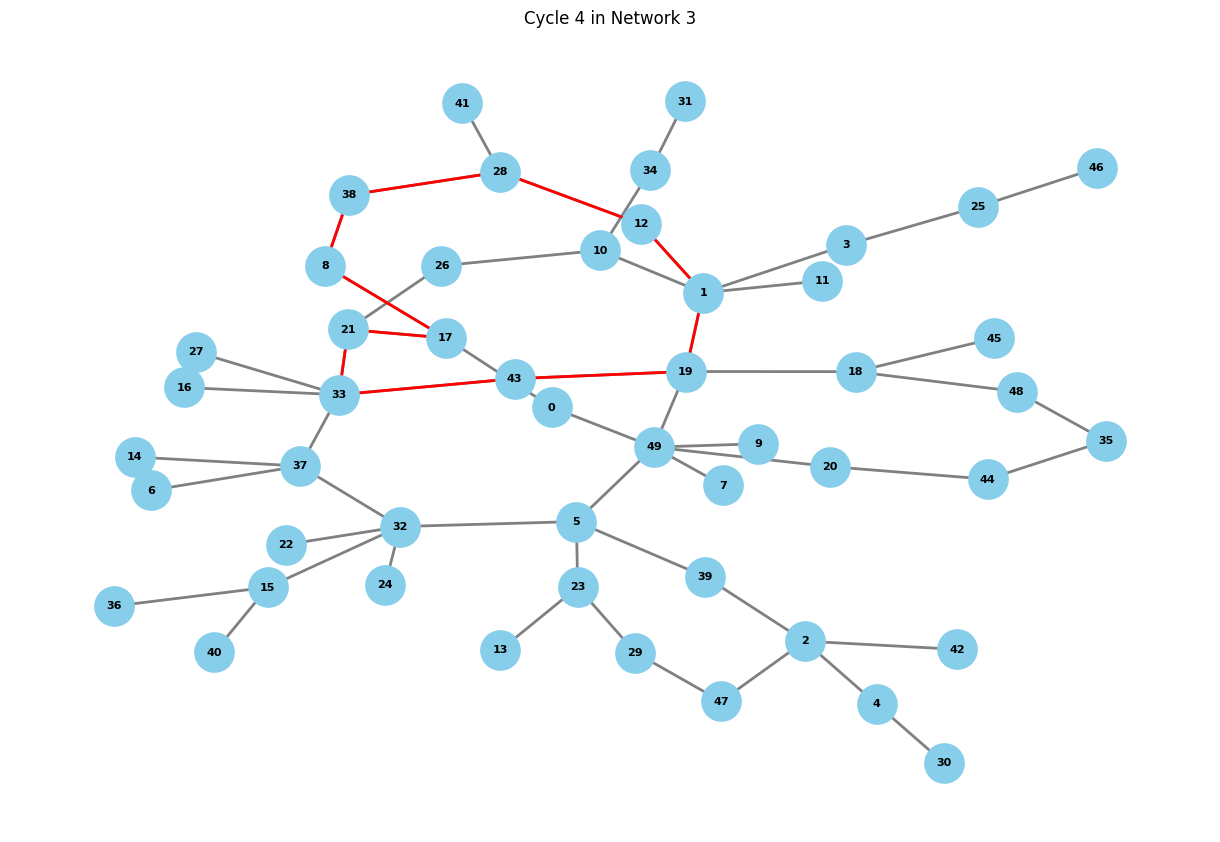

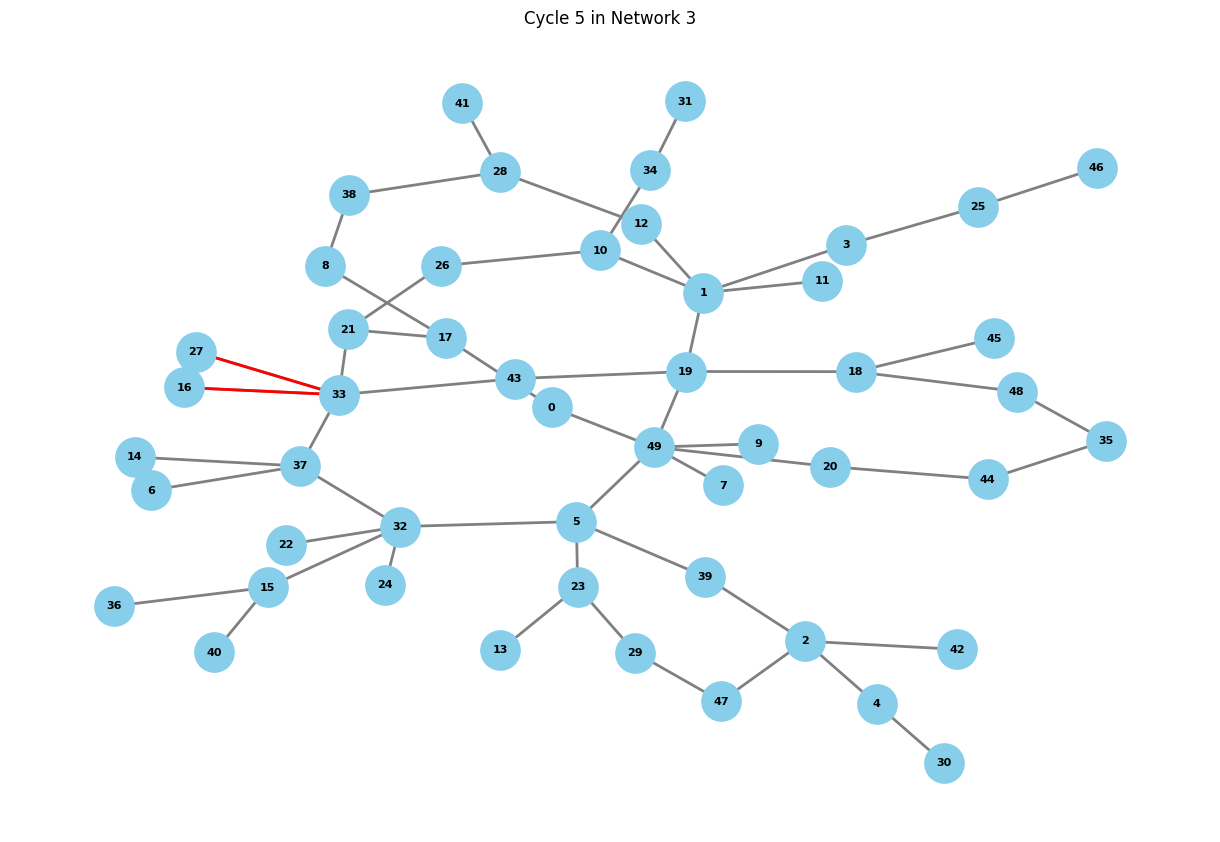

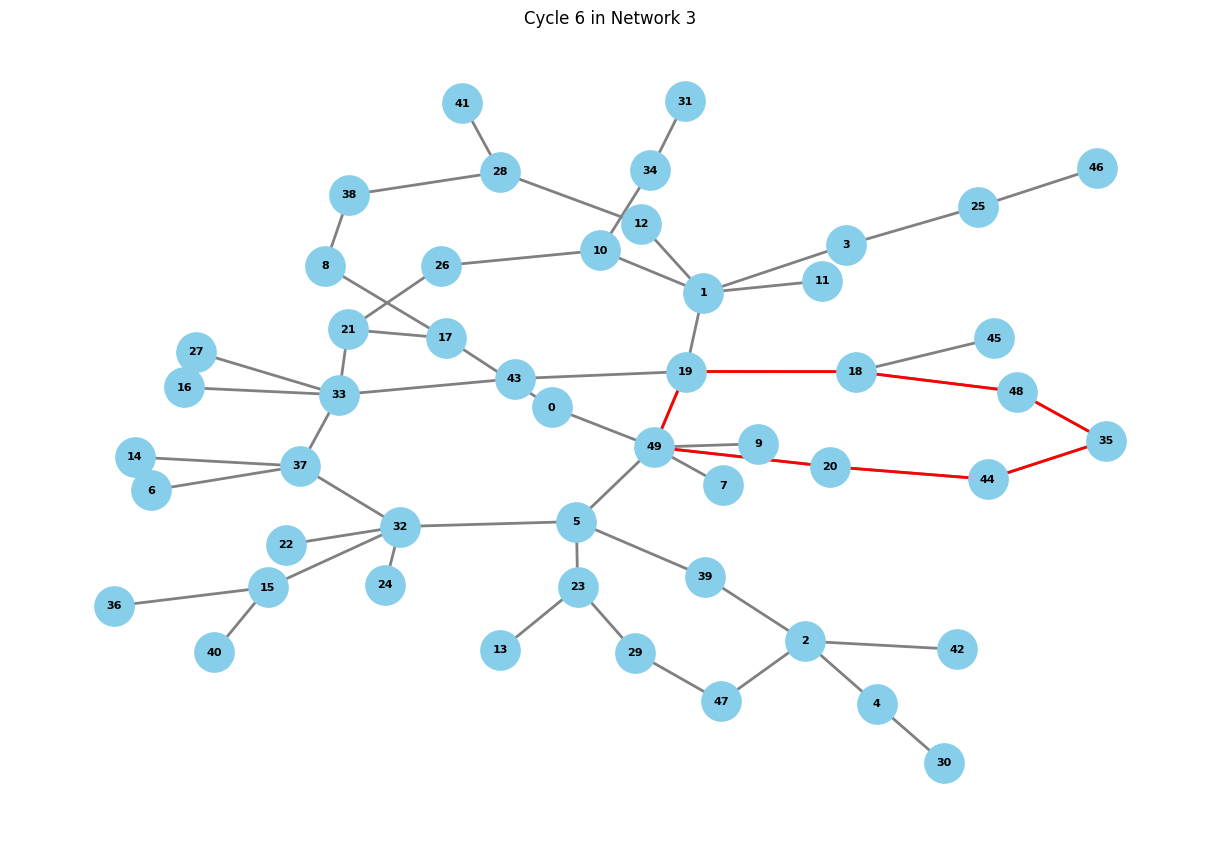

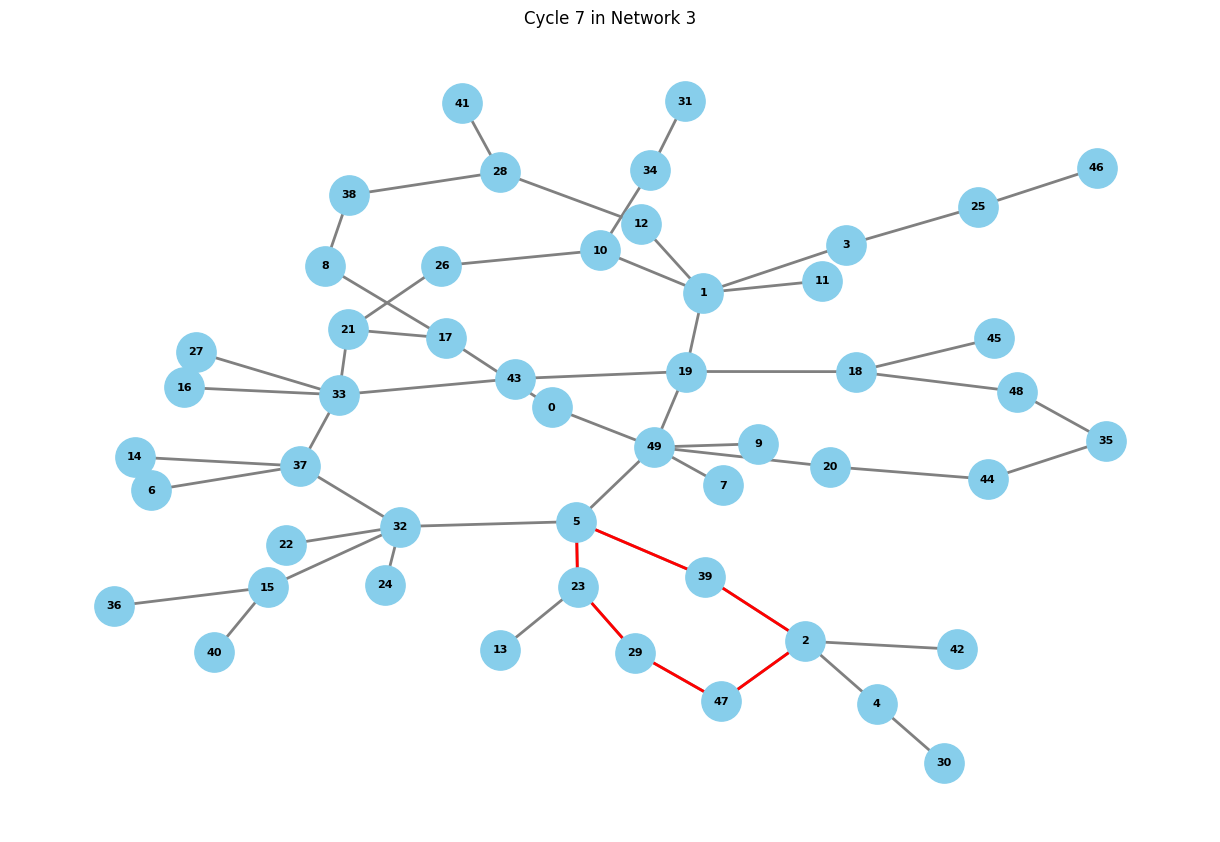

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_graph_with_colored_cycles(graph, title, cycles, pos):
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos=pos, with_labels=True, node_color='skyblue', node_size=800,
            font_size=8, font_weight='bold', edge_color='gray', width=2.0)

    cycle_colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow']
    for i, cycle in enumerate(cycles):
        cycle_edges = [(cycle[j], cycle[j + 1]) for j in range(len(cycle) - 1)]
        cycle_edges.append((cycle[-1], cycle[0]))  # Add edge back to the starting node
        nx.draw_networkx_edges(graph, pos, edgelist=cycle_edges, edge_color=cycle_colors[i % len(cycle_colors)], width=2.0, style='solid')

    plt.title(title)
    plt.show()

# Iterate through all networks and visualize all cycles in each
for network_name, network_data in networks.items():
    graph = network_data['graph']
    pos = network_data['pos']
    cycles = nx.cycle_basis(graph)  # Get a list of cycles
    if cycles:  # Check if there are cycles
        for i, cycle in enumerate(cycles):
            title = f"Cycle {i+1} in {network_name}"
            visualize_graph_with_colored_cycles(graph, title, [cycle], pos)
    else:
        print(f"No cycles found in {network_name}")


#Transport environment

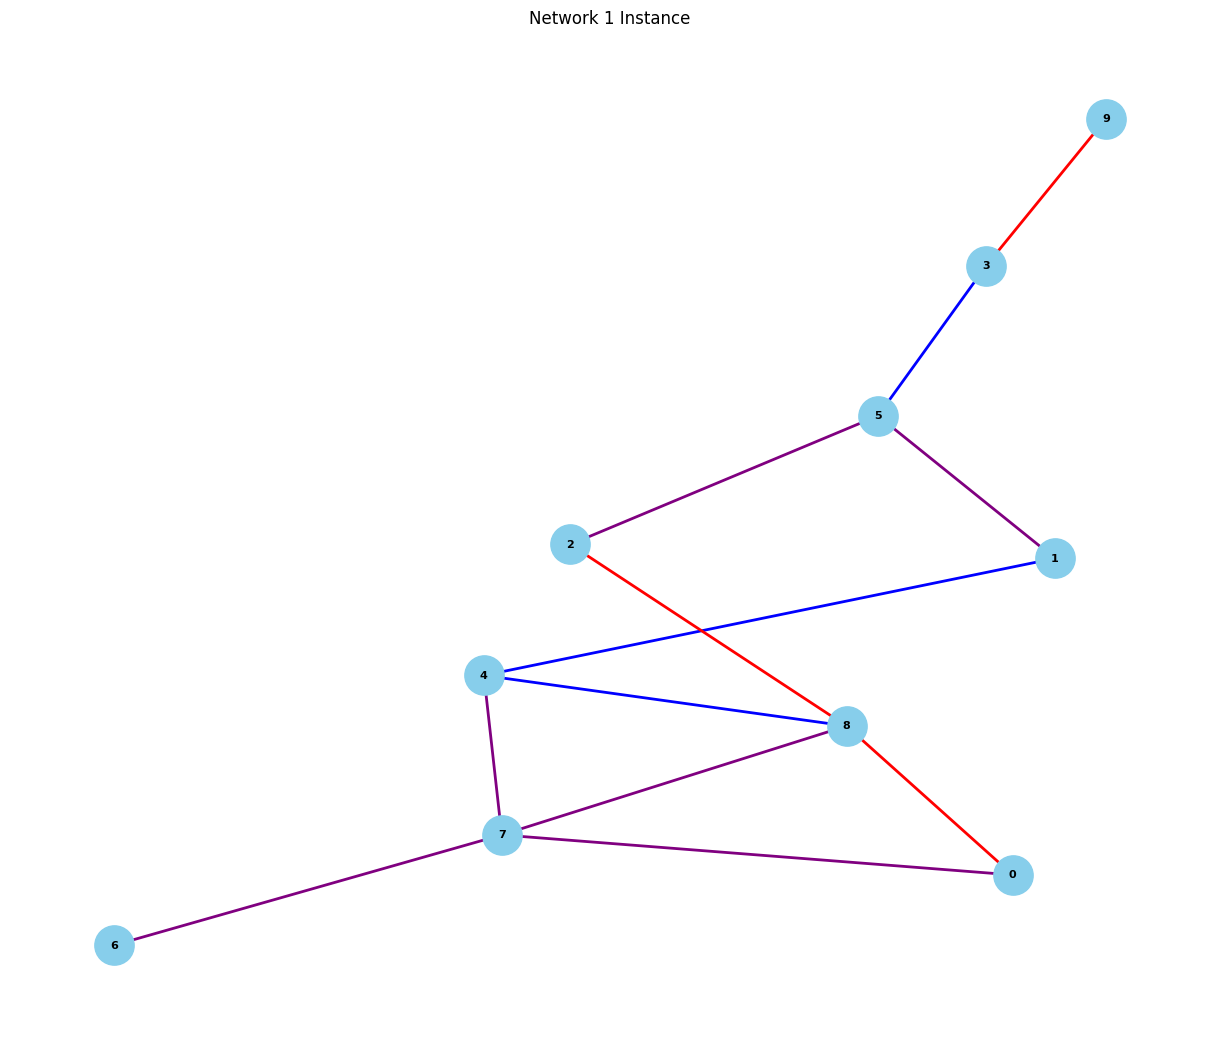

Edges:
(0, 7)
(0, 8)
(1, 4)
(1, 5)
(2, 5)
(2, 8)
(3, 5)
(3, 9)
(4, 7)
(4, 8)
(6, 7)
(7, 8)
{'Network 1': {'graph': <networkx.classes.graph.Graph object at 0x792cc0eec9a0>, 'pos': {0: array([ 0.15921176, -0.58460482]), 1: array([0.1853624 , 0.07883379]), 2: array([-0.11457514,  0.10790027]), 3: array([0.14280847, 0.69208182]), 4: array([-0.16802811, -0.16651576]), 5: array([0.07583132, 0.37753691]), 6: array([-0.39685543, -0.7319467 ]), 7: array([-0.15698873, -0.50077789]), 8: array([ 0.05636784, -0.27250763]), 9: array([0.21686563, 1.        ])}, 'edge_colors': ['purple', 'red', 'blue', 'purple', 'purple', 'red', 'blue', 'red', 'purple', 'blue', 'purple', 'purple'], 'edge_lengths': {(0, 7): 0.3271233752155003, (0, 8): 0.32860542894014966, (1, 4): 0.4302107134630714, (1, 5): 0.3181518678056649, (2, 5): 0.33008869130015744, (2, 8): 0.417051159100476, (3, 5): 0.32159669349729525, (3, 9): 0.31669870679435835, (4, 7): 0.3344443743497029, (4, 8): 0.24816892126427048, (6, 7): 0.33312917808815

In [7]:
# Set random seed for reproducibility
np.random.seed(42)

# Create a dictionary to store modified network information
coloured_networks = {}

# Access the stored graph and node positions for Network 1
graph = networks["Network 1"]['graph']
pos = networks["Network 1"]['pos']
edge_lengths = networks["Network 1"]['edge_lengths']

# Create a copy of the graph for modification
graph_instance = graph.copy()

# Iterate over the edges and assign colors based on conditions
edge_colors = []
for edge in graph_instance.edges():
    if edge in [(1,4), (3, 5)]:
        # Assign blue color to specific edges
        edge_colors.append('blue')
    else:
        # Assign random colors to other edges
        edge_colors.append(np.random.choice(['red', 'blue', 'purple']))



# Store the modified graph and its associated information
coloured_networks["Network 1"] = {'graph': graph_instance, 'pos': pos, 'edge_colors': edge_colors, 'edge_lengths': edge_lengths}

# Visualize the modified graph
visualize_graph(graph_instance, "Network 1 Instance", pos, edge_colors=edge_colors)

# Print out the edges of the graph
print("Edges:")
for edge in graph.edges():
    print(edge)

print(coloured_networks)


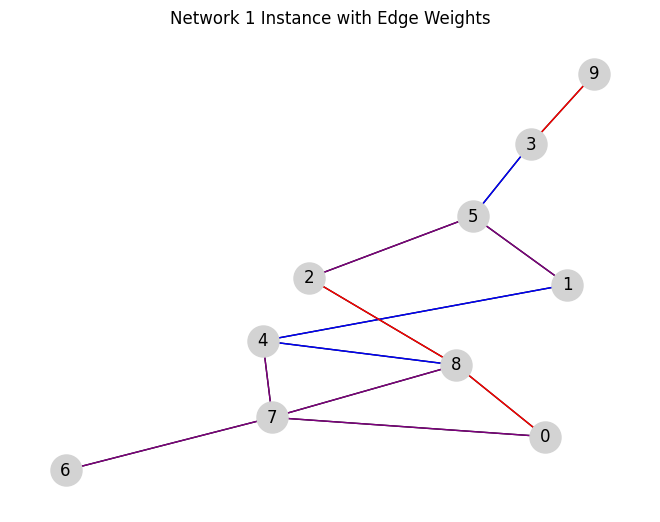

Edges:
(0, 7)
(0, 8)
(1, 4)
(1, 5)
(2, 5)
(2, 8)
(3, 5)
(3, 9)
(4, 7)
(4, 8)
(6, 7)
(7, 8)
{'Network 1': {'graph': <networkx.classes.graph.Graph object at 0x792cc05803d0>, 'pos': {0: array([ 0.15921176, -0.58460482]), 1: array([0.1853624 , 0.07883379]), 2: array([-0.11457514,  0.10790027]), 3: array([0.14280847, 0.69208182]), 4: array([-0.16802811, -0.16651576]), 5: array([0.07583132, 0.37753691]), 6: array([-0.39685543, -0.7319467 ]), 7: array([-0.15698873, -0.50077789]), 8: array([ 0.05636784, -0.27250763]), 9: array([0.21686563, 1.        ])}, 'edge_colors': {(0, 7): 'purple', (0, 8): 'red', (1, 4): 'blue', (1, 5): 'purple', (2, 5): 'purple', (2, 8): 'red', (3, 5): 'blue', (3, 9): 'red', (4, 7): 'purple', (4, 8): 'blue', (6, 7): 'purple', (7, 8): 'purple'}, 'edge_lengths': {(0, 7): 0.3271233752155003, (0, 8): 0.32860542894014966, (1, 4): 0.4302107134630714, (1, 5): 0.3181518678056649, (2, 5): 0.33008869130015744, (2, 8): 0.417051159100476, (3, 5): 0.32159669349729525, (3, 9): 0.3166

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib.colors as mcolors

# Function to visualize the graph with colored edges
def visualize_graph_with_edge_colors(graph, title, pos, edge_colors):
    # Draw nodes
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color='lightgray')

    # Convert edge colors to RGBA format
    edge_colors_rgba = [mcolors.to_rgba(color) for color in edge_colors.values()]

    # Draw edges with specified colors
    nx.draw_networkx_edges(graph, pos, edge_color=edge_colors_rgba)

    # Add title
    plt.title(title)

    # Display the plot
    plt.show()


# Set random seed for reproducibility
np.random.seed(42)

# Create a dictionary to store modified network information
coloured_networks = {}

# Access the stored graph and node positions for Network 1
graph = networks["Network 1"]['graph']
pos = networks["Network 1"]['pos']

# Create a copy of the graph for modification
graph_instance = graph.copy()

# Assign colors to edges based on conditions
edge_colors = {}
for edge in graph_instance.edges():
    if edge in [(1, 4), (3, 5)]:
        # Assign blue color to specific edges
        edge_colors[edge] = 'blue'
    else:
        # Assign random colors to other edges
        edge_colors[edge] = np.random.choice(['red', 'blue', 'purple'])

# Assign weights to edges based on edge colors representing road capacities
edge_weights = []
for edge, color in edge_colors.items():
    if color == 'blue':
        # Assign weight 0.1 to blue (motorways)
        edge_weights.append(0.1)
    elif color == 'purple':
        # Assign weight 0.5 to purple (major roads)
        edge_weights.append(0.5)
    else:
        # Assign weight 0.9 to red (minor roads)
        edge_weights.append(0.9)

# Store the modified graph and its associated information
coloured_networks["Network 1"] = {'graph': graph_instance, 'pos': pos, 'edge_colors': edge_colors, 'edge_lengths': edge_lengths, 'edge_weights': edge_weights}


# Visualize the modified graph with colored edges representing road capacities
visualize_graph_with_edge_colors(graph_instance, "Network 1 Instance with Edge Weights", pos, edge_colors=edge_colors)

# Print out the edges of the graph
print("Edges:")
for edge in graph.edges():
    print(edge)

print(coloured_networks)


{'Network 1': {'graph': <networkx.classes.graph.Graph object at 0x792cc05803d0>, 'pos': {0: array([ 0.15921176, -0.58460482]), 1: array([0.1853624 , 0.07883379]), 2: array([-0.11457514,  0.10790027]), 3: array([0.14280847, 0.69208182]), 4: array([-0.16802811, -0.16651576]), 5: array([0.07583132, 0.37753691]), 6: array([-0.39685543, -0.7319467 ]), 7: array([-0.15698873, -0.50077789]), 8: array([ 0.05636784, -0.27250763]), 9: array([0.21686563, 1.        ])}, 'node_colors': {5: 'yellow', 8: 'yellow', 0: 'purple', 3: 'purple', 6: 'red', 2: 'red', 9: 'red', 1: 'red', 7: 'blue', 4: 'green'}, 'edge_colors': {(0, 7): 'purple', (0, 8): 'red', (1, 4): 'blue', (1, 5): 'purple', (2, 5): 'purple', (2, 8): 'red', (3, 5): 'blue', (3, 9): 'red', (4, 7): 'purple', (4, 8): 'blue', (6, 7): 'purple', (7, 8): 'purple'}, 'edge_lengths': {(0, 7): 0.3271233752155003, (0, 8): 0.32860542894014966, (1, 4): 0.4302107134630714, (1, 5): 0.3181518678056649, (2, 5): 0.33008869130015744, (2, 8): 0.417051159100476, (3

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


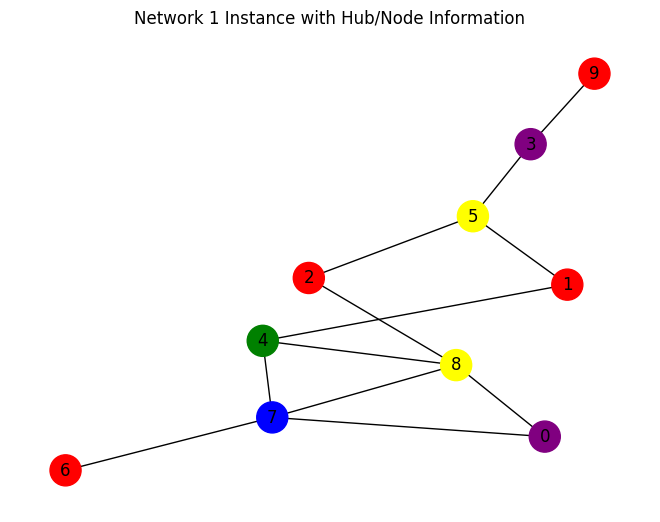

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a dictionary to store network instances with hub information
hub_network = {}

# Function to visualize the graph with colored nodes
def visualize_graph_with_colors(graph, title, pos, node_colors):
    # Draw nodes with specified colors
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=500, cmap=plt.cm.tab10)

    # Add title
    plt.title(title)

    # Display the plot
    plt.show()



# Define hub types for each node
hub_types = {
    5: 'major_hospital',
    8: 'major_hospital',
    0: 'minor_hospital',
    3: 'minor_hospital',
    6: 'clinic',
    2: 'clinic',
    9: 'clinic',
    1: 'clinic',
    7: 'blood_organ_bank',
    4: 'pharmaceutical_equipment_distributor'
}

# Set node colors based on hub types
node_colors = {
    node: 'yellow' if hub_type == 'major_hospital' else
            'purple' if hub_type == 'minor_hospital' else
            'red' if hub_type == 'clinic' else
            'blue' if hub_type == 'blood_organ_bank' else
            'green' if hub_type == 'pharmaceutical_equipment_distributor' else
            'gray'  # Default color for other nodes
    for node, hub_type in hub_types.items()
}

# Define hub capacities
hub_capacities = {
    'major_hospital': {'Blood': 0.3, 'Equipment': 0.3, 'Medication': 0.3, 'Patients': 250, 'Ambulance': 10, 'Delivery Vehicles': 5},
    'minor_hospital': {'Blood': 0.2, 'Equipment': 0.2, 'Medication': 0.2, 'Patients': 100, 'Ambulance': 5, 'Delivery Vehicles': 3},
    'clinic': {'Blood': 0.1, 'Equipment': 0.1, 'Medication': 0.1, 'Patients': 20, 'Ambulance': 2, 'Delivery Vehicles': 1},
    'blood_organ_bank': {'Blood': 1.0, 'Equipment': 0.1, 'Medication': 0.1, 'Patients': 0, 'Ambulance': 2, 'Delivery Vehicles': 10},
    'pharmaceutical_equipment_distributor': {'Blood': 0.0, 'Equipment': 1.0, 'Medication': 1.0, 'Patients': 0, 'Ambulance': 0, 'Delivery Vehicles': 15}
}

# Store the network instance in the dictionary
hub_network["Network 1"] = {'graph': graph_instance, 'pos': pos, 'node_colors': node_colors, 'edge_colors': edge_colors, 'edge_lengths': edge_lengths, 'hub_capacities': hub_capacities}

print(hub_network)

# Visualize the colored network instance with updated node colors
visualize_graph_with_colors(hub_network["Network 1"]['graph'], "Network 1 Instance with Hub/Node Information", coloured_networks["Network 1"]['pos'], [node_colors.get(node, 'gray') for node in graph.nodes()])


{'Network 1': {'graph': <networkx.classes.graph.Graph object at 0x792cc05803d0>, 'pos': {0: array([ 0.15921176, -0.58460482]), 1: array([0.1853624 , 0.07883379]), 2: array([-0.11457514,  0.10790027]), 3: array([0.14280847, 0.69208182]), 4: array([-0.16802811, -0.16651576]), 5: array([0.07583132, 0.37753691]), 6: array([-0.39685543, -0.7319467 ]), 7: array([-0.15698873, -0.50077789]), 8: array([ 0.05636784, -0.27250763]), 9: array([0.21686563, 1.        ])}, 'node_colors': {5: 'yellow', 8: 'yellow', 0: 'purple', 3: 'purple', 6: 'red', 2: 'red', 9: 'red', 1: 'red', 7: 'blue', 4: 'green'}, 'hub_capacities': {'major_hospital': {'Blood': 0.3, 'Equipment': 0.3, 'Medication': 0.3, 'Patients': 250, 'Ambulance': 10, 'Delivery Vehicles': 5}, 'minor_hospital': {'Blood': 0.2, 'Equipment': 0.2, 'Medication': 0.2, 'Patients': 100, 'Ambulance': 5, 'Delivery Vehicles': 3}, 'clinic': {'Blood': 0.1, 'Equipment': 0.1, 'Medication': 0.1, 'Patients': 20, 'Ambulance': 2, 'Delivery Vehicles': 1}, 'blood_orga

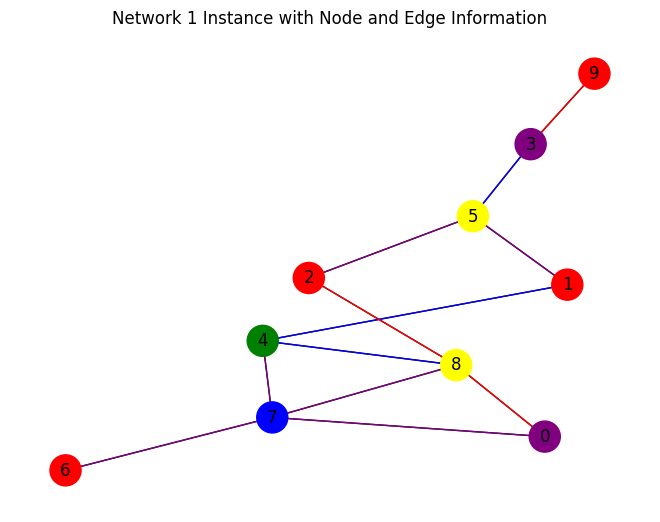

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a dictionary to store the transport environment
transport_environment = {}

# Function to visualize the graph with colored nodes and edges
def visualize_graph_with_node_and_edge_colors(graph, title, pos, node_colors, edge_colors):
    # Print node colors
    print("Node Colors:", node_colors)

    # Convert edge colors to RGBA format
    edge_colors_rgba = [mcolors.to_rgba(color) for color in edge_colors.values()]

    # Draw nodes with specified colors
    nx.draw(graph, pos, with_labels=True, node_color=[node_colors[node] for node in graph.nodes()], node_size=500, cmap=plt.cm.tab10)

    # Draw edges with specified colors
    nx.draw_networkx_edges(graph, pos, edge_color=edge_colors_rgba)

    # Add title
    plt.title(title)

    # Display the plot
    plt.show()

# Access the stored graph and node positions for Network 1
graph = coloured_networks["Network 1"]['graph']
pos = coloured_networks["Network 1"]['pos']
node_colors = hub_network["Network 1"]['node_colors']
hub_capacities = hub_network['Network 1']['hub_capacities']
edge_colors = coloured_networks["Network 1"]['edge_colors']
edge_weights = coloured_networks["Network 1"]['edge_weights']
edge_lengths = coloured_networks["Network 1"]['edge_lengths']

transport_environment["Network 1"] = {'graph': graph, 'pos': pos, 'node_colors': node_colors, 'hub_capacities': hub_capacities, 'edge_colors': edge_colors, 'edge_weights': edge_weights, 'edge_lengths': edge_lengths}
print(transport_environment)


# Visualize the modified graph with both node and edge colors
visualize_graph_with_node_and_edge_colors(graph, "Network 1 Instance with Node and Edge Information", pos, node_colors, edge_colors)


#Network analysis
###diameter(d)

In [11]:
import networkx as nx
# Access the stored graph and node positions for Network 1
graph = coloured_networks["Network 1"]['graph']

# Get edge lengths (assuming edge lengths are stored as attributes named 'length')
edge_lengths = coloured_networks["Network 1"]['edge_lengths']


# Print edge lengths
print("Edge Lengths:")
for edge, length in edge_lengths.items():
    print(edge, length)

# Calculate the diameter of the network
diameter = nx.diameter(graph)
print("Diameter of the network:", diameter)

# Calculate the average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(graph)
print("Average shortest path length:", avg_shortest_path_length)

# Calculate the degree centrality of nodes
degree_centrality = nx.degree_centrality(graph)
print("Degree centrality of nodes:", degree_centrality)

# Calculate the betweenness centrality of nodes
betweenness_centrality = nx.betweenness_centrality(graph)
print("Betweenness centrality of nodes:", betweenness_centrality)

# Calculate the closeness centrality of nodes
closeness_centrality = nx.closeness_centrality(graph)
print("Closeness centrality of nodes:", closeness_centrality)

Edge Lengths:
(0, 7) 0.3271233752155003
(0, 8) 0.32860542894014966
(1, 4) 0.4302107134630714
(1, 5) 0.3181518678056649
(2, 5) 0.33008869130015744
(2, 8) 0.417051159100476
(3, 5) 0.32159669349729525
(3, 9) 0.31669870679435835
(4, 7) 0.3344443743497029
(4, 8) 0.24816892126427048
(6, 7) 0.33312917808815334
(7, 8) 0.31245534176421325
Diameter of the network: 6
Average shortest path length: 2.4444444444444446
Degree centrality of nodes: {0: 0.2222222222222222, 1: 0.2222222222222222, 2: 0.2222222222222222, 3: 0.2222222222222222, 4: 0.3333333333333333, 5: 0.3333333333333333, 6: 0.1111111111111111, 7: 0.4444444444444444, 8: 0.4444444444444444, 9: 0.1111111111111111}
Betweenness centrality of nodes: {0: 0.0, 1: 0.16666666666666666, 2: 0.25, 3: 0.2222222222222222, 4: 0.19444444444444442, 5: 0.41666666666666663, 6: 0.0, 7: 0.25, 8: 0.3055555555555555, 9: 0.0}
Closeness centrality of nodes: {0: 0.391304347826087, 1: 0.47368421052631576, 2: 0.5, 3: 0.36, 4: 0.5, 5: 0.47368421052631576, 6: 0.3214285

In [12]:
# Access the stored graph and node positions for Network 1
graph = coloured_networks["Network 1"]['graph']

# Get edge lengths (assuming edge lengths are stored as attributes named 'length')
edge_lengths = coloured_networks["Network 1"]['edge_lengths']


# Print edge lengths
print("Edge Lengths:")
for edge, length in edge_lengths.items():
    print(edge, length)

Edge Lengths:
(0, 7) 0.3271233752155003
(0, 8) 0.32860542894014966
(1, 4) 0.4302107134630714
(1, 5) 0.3181518678056649
(2, 5) 0.33008869130015744
(2, 8) 0.417051159100476
(3, 5) 0.32159669349729525
(3, 9) 0.31669870679435835
(4, 7) 0.3344443743497029
(4, 8) 0.24816892126427048
(6, 7) 0.33312917808815334
(7, 8) 0.31245534176421325
